# Trainning Isolation Forest on specific dataset sizes
* Dataset       : KDDCUP99 100%
* Subset        : SF
* Total size    : 703066 
* Features      : ["duration", "service", "src_bytes", "dst_bytes"]
* Key attribute : logged_in = True

In [1]:
from imports import *

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
import time

# Configuration 1

In [3]:
df = pd.read_csv('kddcup.data', delimiter=',')
df.columns = sa_columns + ["target"]
print(f"{df.columns}")
print(np.array(df.head(1)))

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')
[[0 'tcp' 'http' 'SF' 162 4528 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 1 1 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 'normal.']]


In [4]:
scoring = {'AUC': 'roc_auc',
           'Precision': make_scorer(precision_score, pos_label=1), 
           'Recall': make_scorer(recall_score, pos_label=-1),
           'F1': make_scorer(f1_score, average='weighted')}

## Configuration 1
* frac = 0.1
* random_state = 1
* IF random_state = 1

In [5]:
dfsf = df[df["logged_in"]== 1]
print(len(dfsf)- len(dfsf.loc[dfsf["target"]=='normal.']))
dfsf = dfsf[sf_columns + ["target"]] 
# print(dfsf.head(1))
# Split the dataset into 2 classes for consistent anomaly_rate when sampling
dfsf_normal = dfsf.loc[dfsf["target"]=='normal.']
dfsf_attack = dfsf.loc[dfsf["target"]!='normal.']
# print(f"A sample normal frame: \t {dfsf_normal.head(1)}")
# print("-----------------")
# print(f"A sample attack frame: \t {dfsf_attack.head(1)}")


3377


In [6]:
frac = 0.1

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 1).append(dfsf_attack.sample(frac = frac, random_state = 1))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=1)
gs_if_1 = GridSearchCV(IsolationForest(random_state = 1, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [1000], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_1.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_1 = gs_if_1.cv_results_

anomaly rate is 0.5% out of 70307 records
Time for IF fitting: 1064.684


In [7]:
frac = 0.2

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 2).append(dfsf_attack.sample(frac = frac, random_state = 2))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=2)
gs_if_2 = GridSearchCV(IsolationForest(random_state = 2, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [1000], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_2.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_2 = gs_if_2.cv_results_

anomaly rate is 0.5% out of 140613 records
Time for IF fitting: 2132.449


In [8]:
frac = 0.5

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 3).append(dfsf_attack.sample(frac = frac, random_state = 3))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=3)
gs_if_3 = GridSearchCV(IsolationForest(random_state = 3, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [500], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_3.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_3 = gs_if_3.cv_results_

anomaly rate is 0.5% out of 351532 records
Time for IF fitting: 2446.678


In [12]:
frac = 1.0

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 4).append(dfsf_attack.sample(frac = frac, random_state = 4))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=4)
gs_if_4 = GridSearchCV(IsolationForest(random_state = 4, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [500], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_4.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_4 = gs_if_4.cv_results_

anomaly rate is 0.5% out of 703066 records
Time for IF fitting: 5901.510


<ipython-input-13-fc3aad0c0375>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


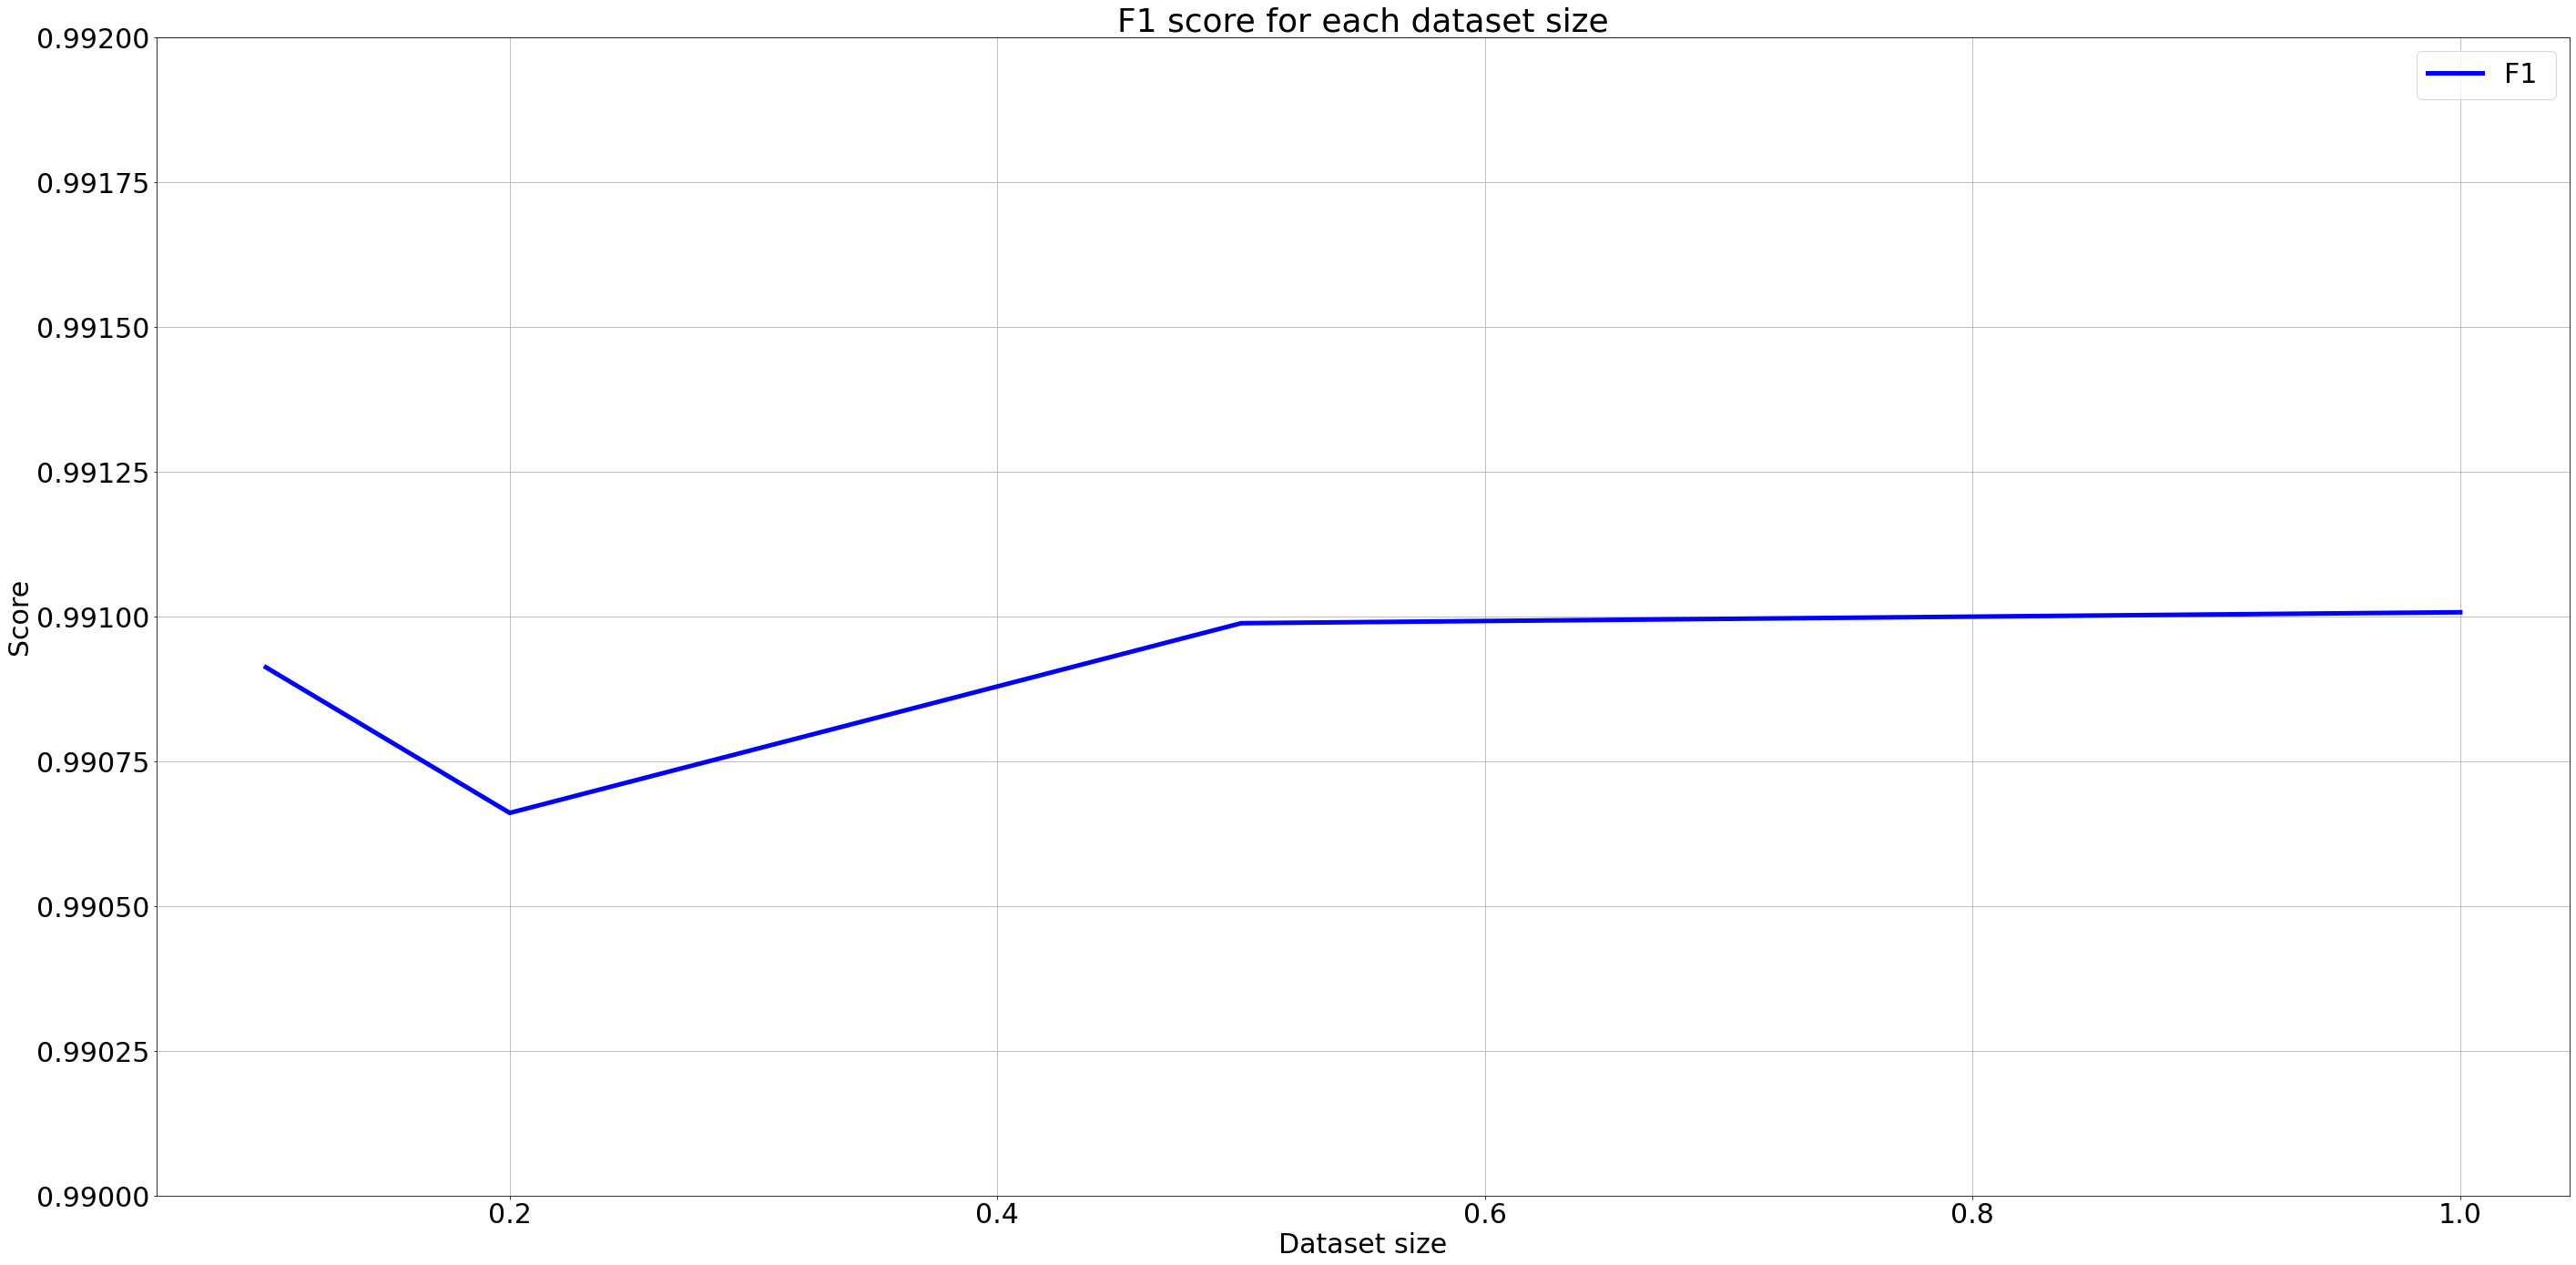

In [13]:
plt.figure(figsize=(40,20))
plt.title('F1 score for each dataset size')
plt.xlabel("Dataset size")
plt.ylabel("Score")
plt.rc('font', size=30)
ax = plt.axes()
ax.set_ylim(0.99, 0.992)
pad = 0.005

labels = np.array([0.1, 0.2, 0.5, 1.0])

colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'

best_index = np.nonzero(results_if_1['rank_test_%s' % scorer] == 1)[0][0]
best_score_1 = results_if_1['mean_test_%s' % scorer][best_index]
best_param_1 = results_if_1['params'][best_index]

best_index = np.nonzero(results_if_2['rank_test_%s' % scorer] == 1)[0][0]
best_score_2 = results_if_2['mean_test_%s' % scorer][best_index]
best_param_2 = results_if_2['params'][best_index]

best_index = np.nonzero(results_if_3['rank_test_%s' % scorer] == 1)[0][0]
best_score_3 = results_if_3['mean_test_%s' % scorer][best_index]
best_param_3 = results_if_3['params'][best_index]

best_index = np.nonzero(results_if_4['rank_test_%s' % scorer] == 1)[0][0]
best_score_4 = results_if_4['mean_test_%s' % scorer][best_index]
best_param_4 = results_if_4['params'][best_index]

Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis, '-', color=colors['2'],label="%s " % (scorer), linewidth=5)
plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_dataset_size.png", dpi=100)

plt.show()

# Comparison against default values

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=1)
param = best_param_1
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 1).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 1).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=2)
param = best_param_2
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 2).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 2).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=3)
param = best_param_3
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 3).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 3).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=4)
param = best_param_4
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 4).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 4).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
fig, ax = plt.subplots(figsize = (30,20))
plt.rc('font', size=30)

f1_tuned = [0.9954178136425095, 0.9952542140292294, 0.9953171367636211, 0.9952334249285871]
f1_default = [0.9615918309257809, 0.955213461022107, 0.9576507857113085, 0.9571646010002174]
width = 1
labels = [f"contamination: {best_param_1['contamination']}\nmax_samples: {best_param_1['max_samples']}\nn_estimators: {best_param_1['n_estimators']}", 
          f"contamination: {best_param_2['contamination']}\nmax_samples: {best_param_2['max_samples']}\nn_estimators: {best_param_2['n_estimators']}", 
          f"contamination: {best_param_3['contamination']}\nmax_samples: {best_param_3['max_samples']}\nn_estimators: {best_param_3['n_estimators']}", 
          f"contamination: {best_param_4['contamination']}\nmax_samples: {best_param_4['max_samples']}\nn_estimators: {best_param_4['n_estimators']}"]
ax.set_xticks([i*5 + width/2 for i in range(len(f1_tuned))])
ax.set_xticklabels(labels)
ax.set_ylabel('F1-score')

ax.legend(['f1 score tuned', 'f1 score not tuned'])
ax.set_title('f1 score before and after parameter tuning using cross validation search')

ax.bar([i*5 for i in range(len(f1_tuned))], f1_tuned, width=width)
ax.bar([i*5 + width for i in range(len(f1_tuned))], f1_default, width=width)
fig.tight_layout()
ax.legend()
plt.show()

# Archive

### Configuration 1

In [22]:
results_if_1

{'mean_fit_time': array([12.8687125 , 11.92321833, 11.83350293, 11.96472224, 11.90649072,
        11.81943989, 12.11054571, 11.96175249, 11.7296718 , 12.61882043,
        12.9819204 , 12.29640683, 12.38362058, 11.94079955, 12.19693335]),
 'std_fit_time': array([0.56164772, 0.10620015, 0.05889462, 0.16015218, 0.23449056,
        0.2838635 , 0.36649184, 0.26265151, 0.34700901, 0.32483116,
        0.27883579, 0.28826823, 0.40875308, 0.22520257, 0.21769408]),
 'mean_score_time': array([11.16618919, 10.80726862, 10.70048062, 10.83713277, 10.76808294,
        10.72212044, 10.89475465, 10.88547937, 10.87786992, 11.88444448,
        11.5001204 , 11.15382751, 11.44303775, 10.73238627, 11.17452168]),
 'std_score_time': array([0.39150727, 0.20609302, 0.20266936, 0.23547509, 0.2166497 ,
        0.27961303, 0.1388056 , 0.28559419, 0.11563014, 0.09762611,
        0.24504991, 0.43056558, 0.31079604, 0.05496746, 0.1461866 ]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

### Configuration 2

In [23]:
results_if_2

{'mean_fit_time': array([23.81737638, 23.54276244, 24.267682  , 24.14979053, 23.42664051,
        23.932362  , 24.49562899, 25.63367407, 24.03727667, 23.89467454,
        24.06178602, 24.5661362 , 24.75192817, 23.95182165, 24.32452623]),
 'std_fit_time': array([0.10183349, 0.18271452, 0.39754533, 0.14790514, 0.17826663,
        0.37281019, 0.67234086, 0.40159887, 0.14222028, 0.29349206,
        0.24939598, 0.1247472 , 0.66575852, 0.41460117, 0.07172709]),
 'mean_score_time': array([21.85281555, 22.06613215, 22.40451694, 21.83587233, 22.15761789,
        22.38378723, 22.88541849, 22.86617446, 22.00236917, 22.00897916,
        22.41607745, 22.4287746 , 22.2035164 , 22.56151088, 22.53866394]),
 'std_score_time': array([0.34785561, 0.43551053, 0.117181  , 0.22452905, 0.54435207,
        0.49595343, 0.52496671, 0.55972981, 0.20982739, 0.46376524,
        0.4276049 , 0.25429209, 0.04225872, 0.20777844, 0.29054137]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

In [17]:
param = best_param_2
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 2).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(classification_report(y_test_sf, y_pred, target_names=["normal", "anomaly"]))

tuned parameters: {'contamination': 0.005, 'max_samples': 0.25, 'n_estimators': 1000}
Time for IF fitting: 307.063
              precision    recall  f1-score   support

      normal       0.06      0.07      0.07       870
     anomaly       1.00      0.99      1.00    174897

    accuracy                           0.99    175767
   macro avg       0.53      0.53      0.53    175767
weighted avg       0.99      0.99      0.99    175767



### Configuration 3

In [24]:
results_if_3

{'mean_fit_time': array([30.28257322, 29.92446224, 30.86247921, 30.63525446, 28.51390092,
        26.55980388, 26.89524857, 26.9994506 , 26.96605635, 26.53106769,
        26.6363469 , 26.95608711, 26.86767411, 26.46747518, 26.54506628]),
 'std_fit_time': array([0.47855092, 0.71776731, 0.20713156, 1.08000496, 1.71264144,
        0.12616408, 0.76828325, 0.5649669 , 0.61128935, 0.19679529,
        0.50762674, 0.31086446, 0.83831555, 0.324673  , 0.2502925 ]),
 'mean_score_time': array([28.25537086, 27.95209225, 28.71735811, 28.87151941, 24.61553081,
        24.23223853, 24.41061974, 24.2653629 , 24.46736185, 24.58708517,
        25.13847327, 24.59504326, 25.07405233, 24.31069048, 24.17915527]),
 'std_score_time': array([0.15561531, 0.45089303, 1.1813023 , 0.98006968, 0.63147611,
        0.13212752, 0.25910473, 0.06408045, 0.16372968, 0.45688757,
        0.59634037, 0.50859952, 0.36788149, 0.31285136, 0.54701402]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

### Configuration 4

In [25]:
results_if_4

{'mean_fit_time': array([70.23992483, 67.90861177, 65.43881909, 65.05286455, 66.94973048,
        68.16033602, 66.43497578, 64.32121642, 66.0939122 , 66.34490164,
        68.61725847, 68.95048118, 67.39072363, 66.83609207, 69.55808671]),
 'std_fit_time': array([0.94060789, 0.80788331, 1.18959946, 0.60387656, 2.18537927,
        1.47060625, 1.60429337, 1.42061277, 1.89506566, 2.92397031,
        1.23042945, 1.91888438, 0.49489993, 0.64739161, 1.30551397]),
 'mean_score_time': array([62.41566586, 61.32064899, 60.82845966, 59.30591559, 61.91655755,
        60.97704887, 60.05648279, 58.72743265, 59.53774873, 61.3185068 ,
        63.25760325, 61.55596654, 61.31900859, 61.78304323, 64.45723168]),
 'std_score_time': array([1.08702264, 0.60437604, 1.25866435, 0.71035583, 1.42137346,
        0.80827911, 1.08538385, 0.90992444, 1.02887821, 1.83509434,
        0.33516665, 1.25933365, 0.22724092, 0.52785709, 0.79348298]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=1)
gs_if_1 = GridSearchCV(IsolationForest(random_state = 1, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [100], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_1.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_1 = gs_if_1.cv_results_

# Tuning parameters manually 

In [9]:
def cross_validation(contamination, max_samples, n_estimators, random_state, silent=True):
    highest_score = 0
    highest_score_c = 0
    for c in contamination:
        s = datetime.datetime.now()
        y_pred = IsolationForest(random_state= random_state, n_jobs=-1, max_samples = max_samples, n_estimators = n_estimators, contamination=c).fit(x_train).predict(x_test)
        t = datetime.datetime.now() - s
        p, r, f, s = map(lambda x: x[0], precision_recall_fscore_support(y_test, y_pred, labels=[-1]))
        # p = tp / (tp + fp)
        f = f1_score(y_test, y_pred, average = "macro")
        r = recall_score(y_test, y_pred, pos_label = -1)
        a = roc_auc_score(y_test, y_pred)
        if f + r > highest_score: highest_score = f + r; highest_score_c = c
        
        yp = np.array(y_pred)
        yt = np.array(y_test)
        
        prediction = yp[np.where(yt == -1)]

        tp = len(yp[np.where(prediction == -1)])
        
        fp = tp / p - tp
        # predicted true
        positives = yp[np.where(yp == -1)]
        if not silent:
            print(f"Finished trainning in {t} seconds")
            print(f"contamination: {c} \t tp: {tp}/support: {s}/predicted: {len(positives)} -> fp = {len(positives) - tp}")
            print(f"AUC : {a:.1%} \t precision: {p:.3} \t recall: {r:.3} \t f1: {f}")
            print("--------------------")
    return (highest_score_c, y_pred, f, len(positives) - tp, tp, p, r, t)

# ####
# target = "target"
# sf = datasets.fetch_kddcup99(subset='SF', percent10=True)
# dfSF=pd.DataFrame(sf.data, 
#                   columns=["duration", "service", "src_bytes", "dst_bytes"])
# assert len(dfSF)>0, "SF dataset no loaded."

# dfSF[target]=sf.target
# anomaly_rateSF = 1.0 - len(dfSF.loc[dfSF[target]==b'normal.'])/len(dfSF)

# "SF Anomaly Rate is:"+"{:.1%}".format(anomaly_rateSF)

# dfSF['binary_target'] = [1 if x==b'normal.' else -1 for x in dfSF[target]]

# toDecode = toDecodeSF
# leSF = preprocessing.LabelEncoder()
# for f in toDecode:
#     dfSF[f] = list(map(byte_decoder, dfSF[f]))
#     dfSF[f] = leSF.fit_transform(dfSF[f])
# ####
frac = 0.2

dfSF = dfsf_normal.sample(frac = frac, random_state = 1).append(dfsf_attack.sample(frac = frac, random_state = 1))

anomaly_rate = 1.0 - len(dfSF.loc[dfSF["target"]=='normal.'])/len(dfSF)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfSF)} records")

dfSF['binary_target'] = [1 if x=='normal.' else -1 for x in dfSF["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfSF[f] = leSF.fit_transform(dfSF[f])

anomaly rate is 0.5% out of 140613 records


In [15]:
Y_axis_f1 = []
Y_axis_recall = []
Y_axis_auc = []
best_param = []

rs = 1
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=False)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
Y_axis_auc.append(roc_auc_score(y_test, y_pred))
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 2
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 200

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 3
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 4
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 5
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 6
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.1
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

Finished trainning in 0:00:26.063055 seconds
contamination: 0.05 	 tp: 683/support: 842/predicted: 8817 -> fp = 8134
AUC : 88.2% 	 precision: 0.0775 	 recall: 0.811 	 f1: 0.5585825517420077
--------------------
Finished trainning in 0:00:26.165337 seconds
contamination: 0.07 	 tp: 684/support: 842/predicted: 12247 -> fp = 11563
AUC : 87.3% 	 precision: 0.0559 	 recall: 0.812 	 f1: 0.5349416611459239
--------------------
Finished trainning in 0:00:26.197794 seconds
contamination: 0.09000000000000001 	 tp: 684/support: 842/predicted: 15806 -> fp = 15122
AUC : 86.3% 	 precision: 0.0433 	 recall: 0.812 	 f1: 0.5182722827095416
--------------------
Finished trainning in 0:00:26.292786 seconds
contamination: 0.11000000000000001 	 tp: 684/support: 842/predicted: 19318 -> fp = 18634
AUC : 85.3% 	 precision: 0.0354 	 recall: 0.812 	 f1: 0.5055739026857009
--------------------
Finished trainning in 0:00:26.272935 seconds
contamination: 0.13 	 tp: 688/support: 842/predicted: 22888 -> fp = 22200
A

<ipython-input-16-a5fb76343e1c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


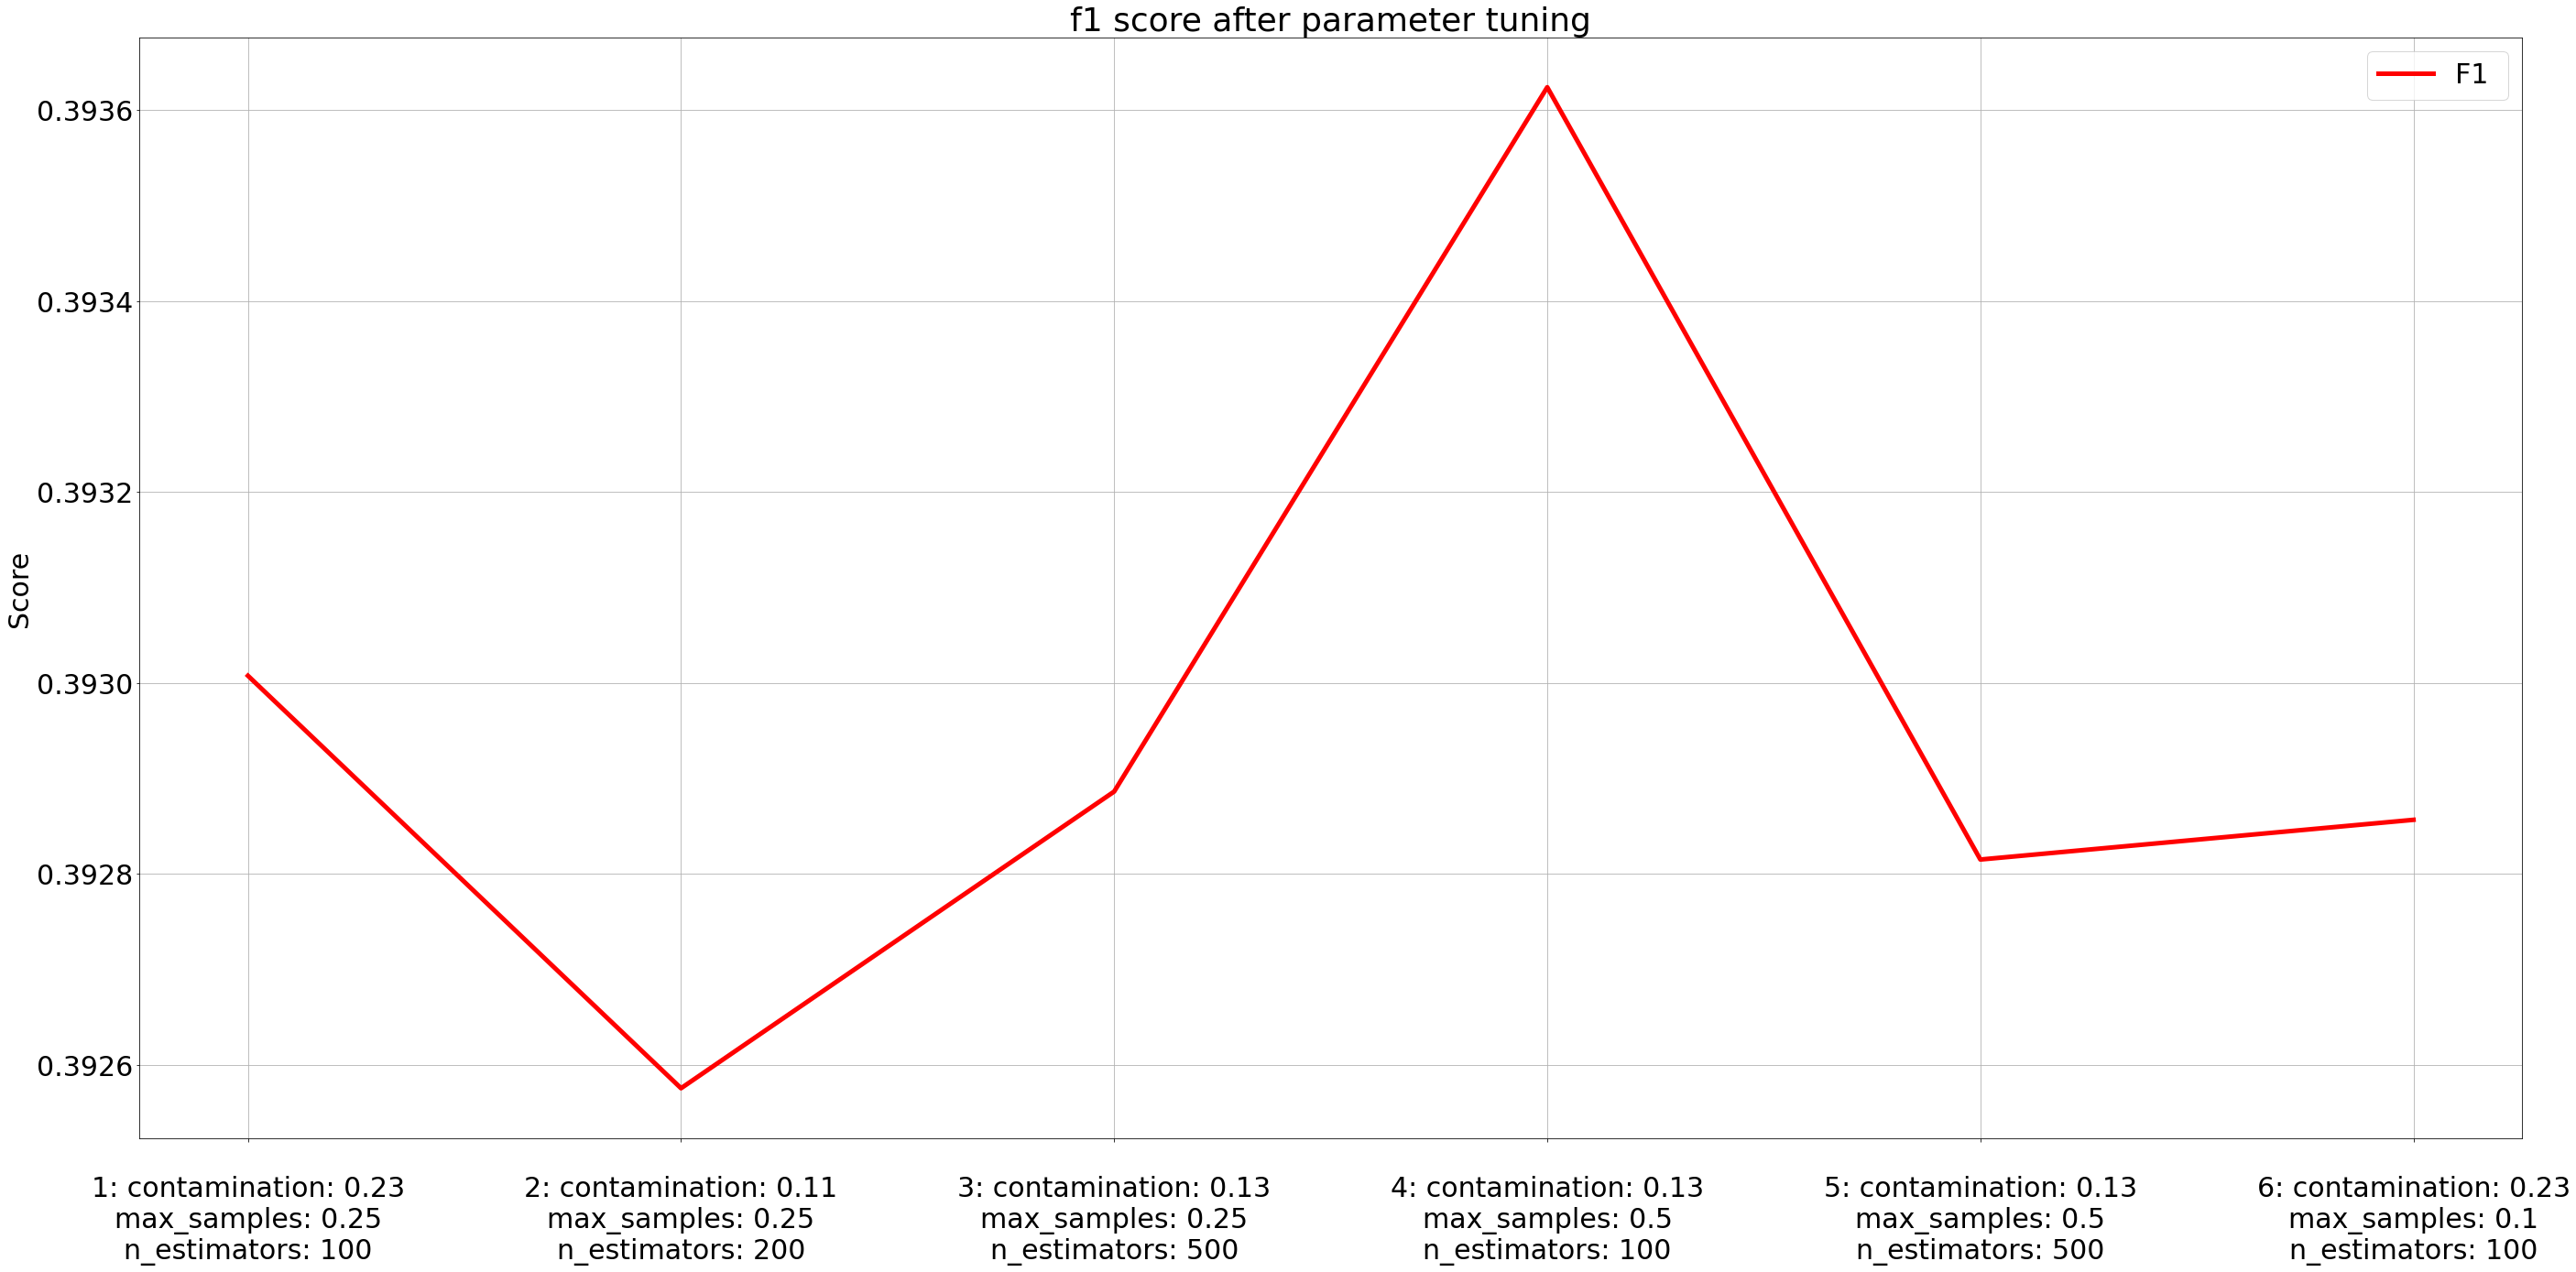

<ipython-input-16-a5fb76343e1c>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


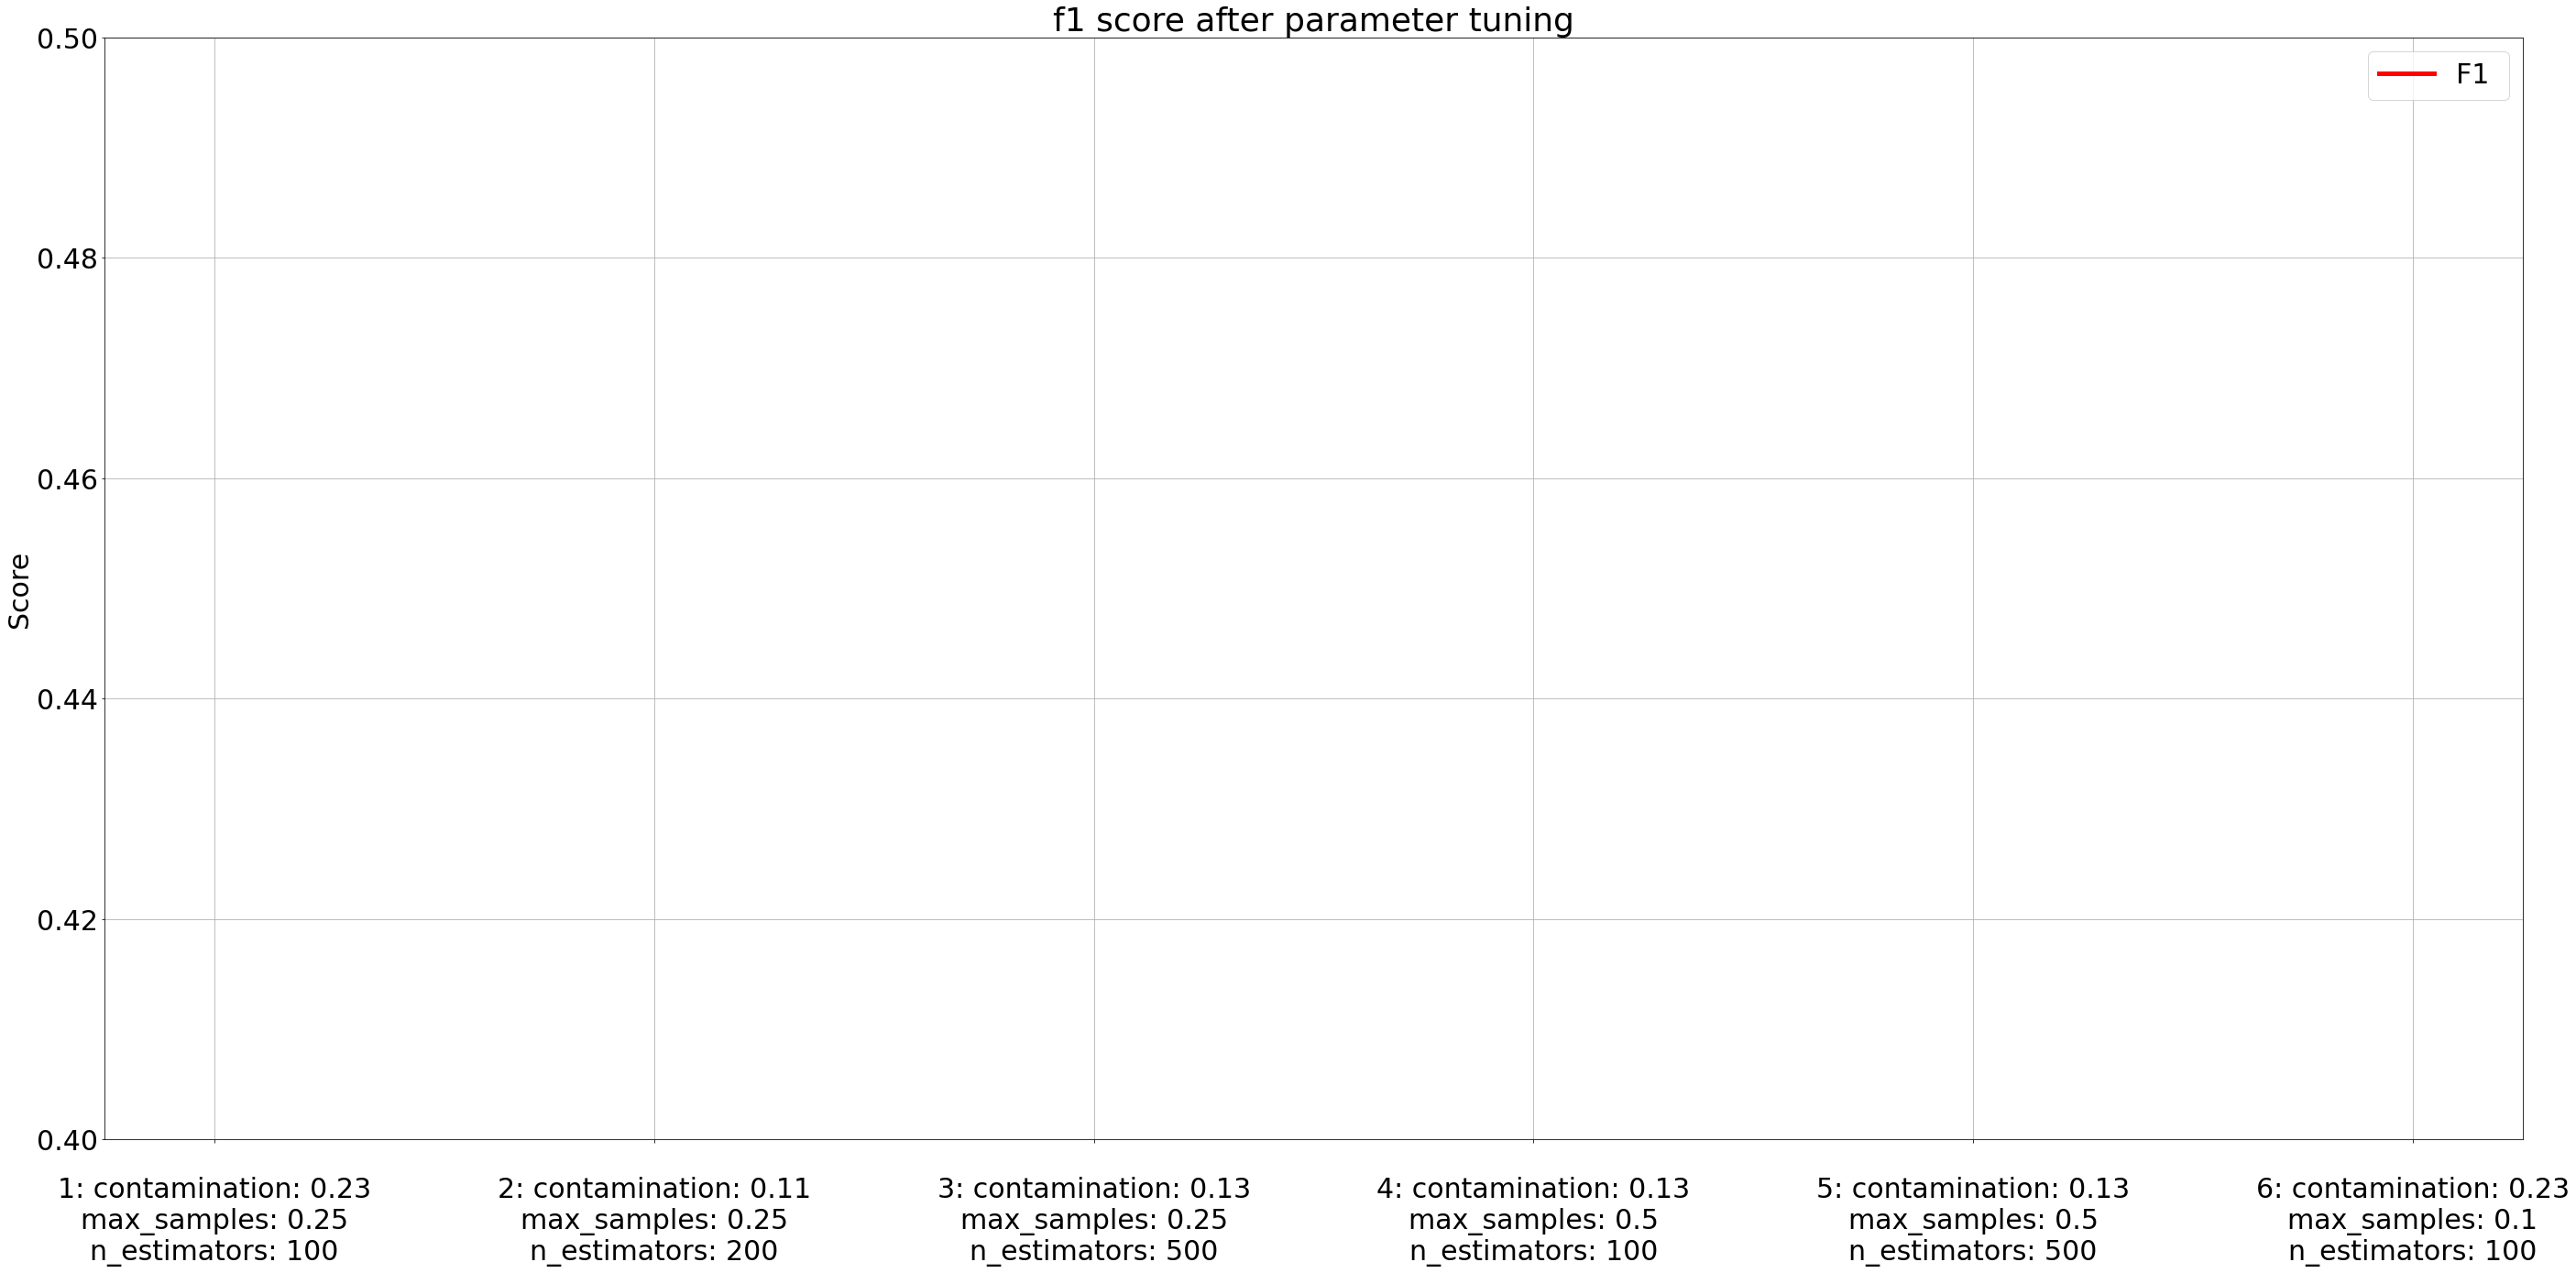

---[1, 0.23000000000000004, 0.25, 100]
Time for IF fitting: 26.514
---0.04093268035962284
---0.8863041337363112
---0.8863041337363111
---0.14278993178075747
---[2, 0.11000000000000001, 0.25, 200]
Time for IF fitting: 53.598
---0.08543940980010965
---0.9475530272711681
---0.9475530272711681
---0.13915857605177995
---[3, 0.13, 0.25, 500]
Time for IF fitting: 132.362
---0.07048309586038276
---0.9346041899927235
---0.9346041899927235
---0.13731275533363596
---[4, 0.13, 0.5, 100]
Time for IF fitting: 29.280
---0.07343868841375813
---0.9367398210532978
---0.9367398210532978
---0.1437016825829923
---[5, 0.13, 0.5, 500]
Time for IF fitting: 148.009
---0.0704558910597987
---0.9359836999451352
---0.9359836999451352
---0.13467244921250857
---[6, 0.23000000000000004, 0.1, 100]
Time for IF fitting: 23.040
---0.042711551090895826
---0.8869134461560031
---0.886913446156003
---0.14395306859205775


In [16]:
plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
# ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_F1.png", dpi=100)

plt.show()

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_AUC.png", dpi=100)

plt.show()

# Comparison against default values

f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []

for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.045, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))

In [28]:
best_param = [(1, 0.23, 0.25, 100), (2, 0.11, 0.25, 200), (3, 0.13, 0.25, 500), (4, 0.13, 0.5, 100), (5, 0.13, 0.5, 500), (6, 0.23, 0.1, 100)]
f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []

for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    print(classification_report(y_test, y_pred))
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.045, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    print(classification_report(y_test, y_pred))
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))

---[1, 0.23, 0.25, 100]
Time for IF fitting: 26.481
---0.04093268035962284
              precision    recall  f1-score   support

          -1       0.02      1.00      0.04       842
           1       1.00      0.77      0.87    174925

    accuracy                           0.78    175767
   macro avg       0.51      0.89      0.46    175767
weighted avg       1.00      0.78      0.87    175767

---0.8863041337363112
---0.8863041337363111
---0.14278993178075747
              precision    recall  f1-score   support

          -1       0.08      0.72      0.14       842
           1       1.00      0.96      0.98    174925

    accuracy                           0.96    175767
   macro avg       0.54      0.84      0.56    175767
weighted avg       0.99      0.96      0.97    175767

---[2, 0.11, 0.25, 200]
Time for IF fitting: 53.074
---0.08543940980010965
              precision    recall  f1-score   support

          -1       0.04      1.00      0.09       857
           1       1

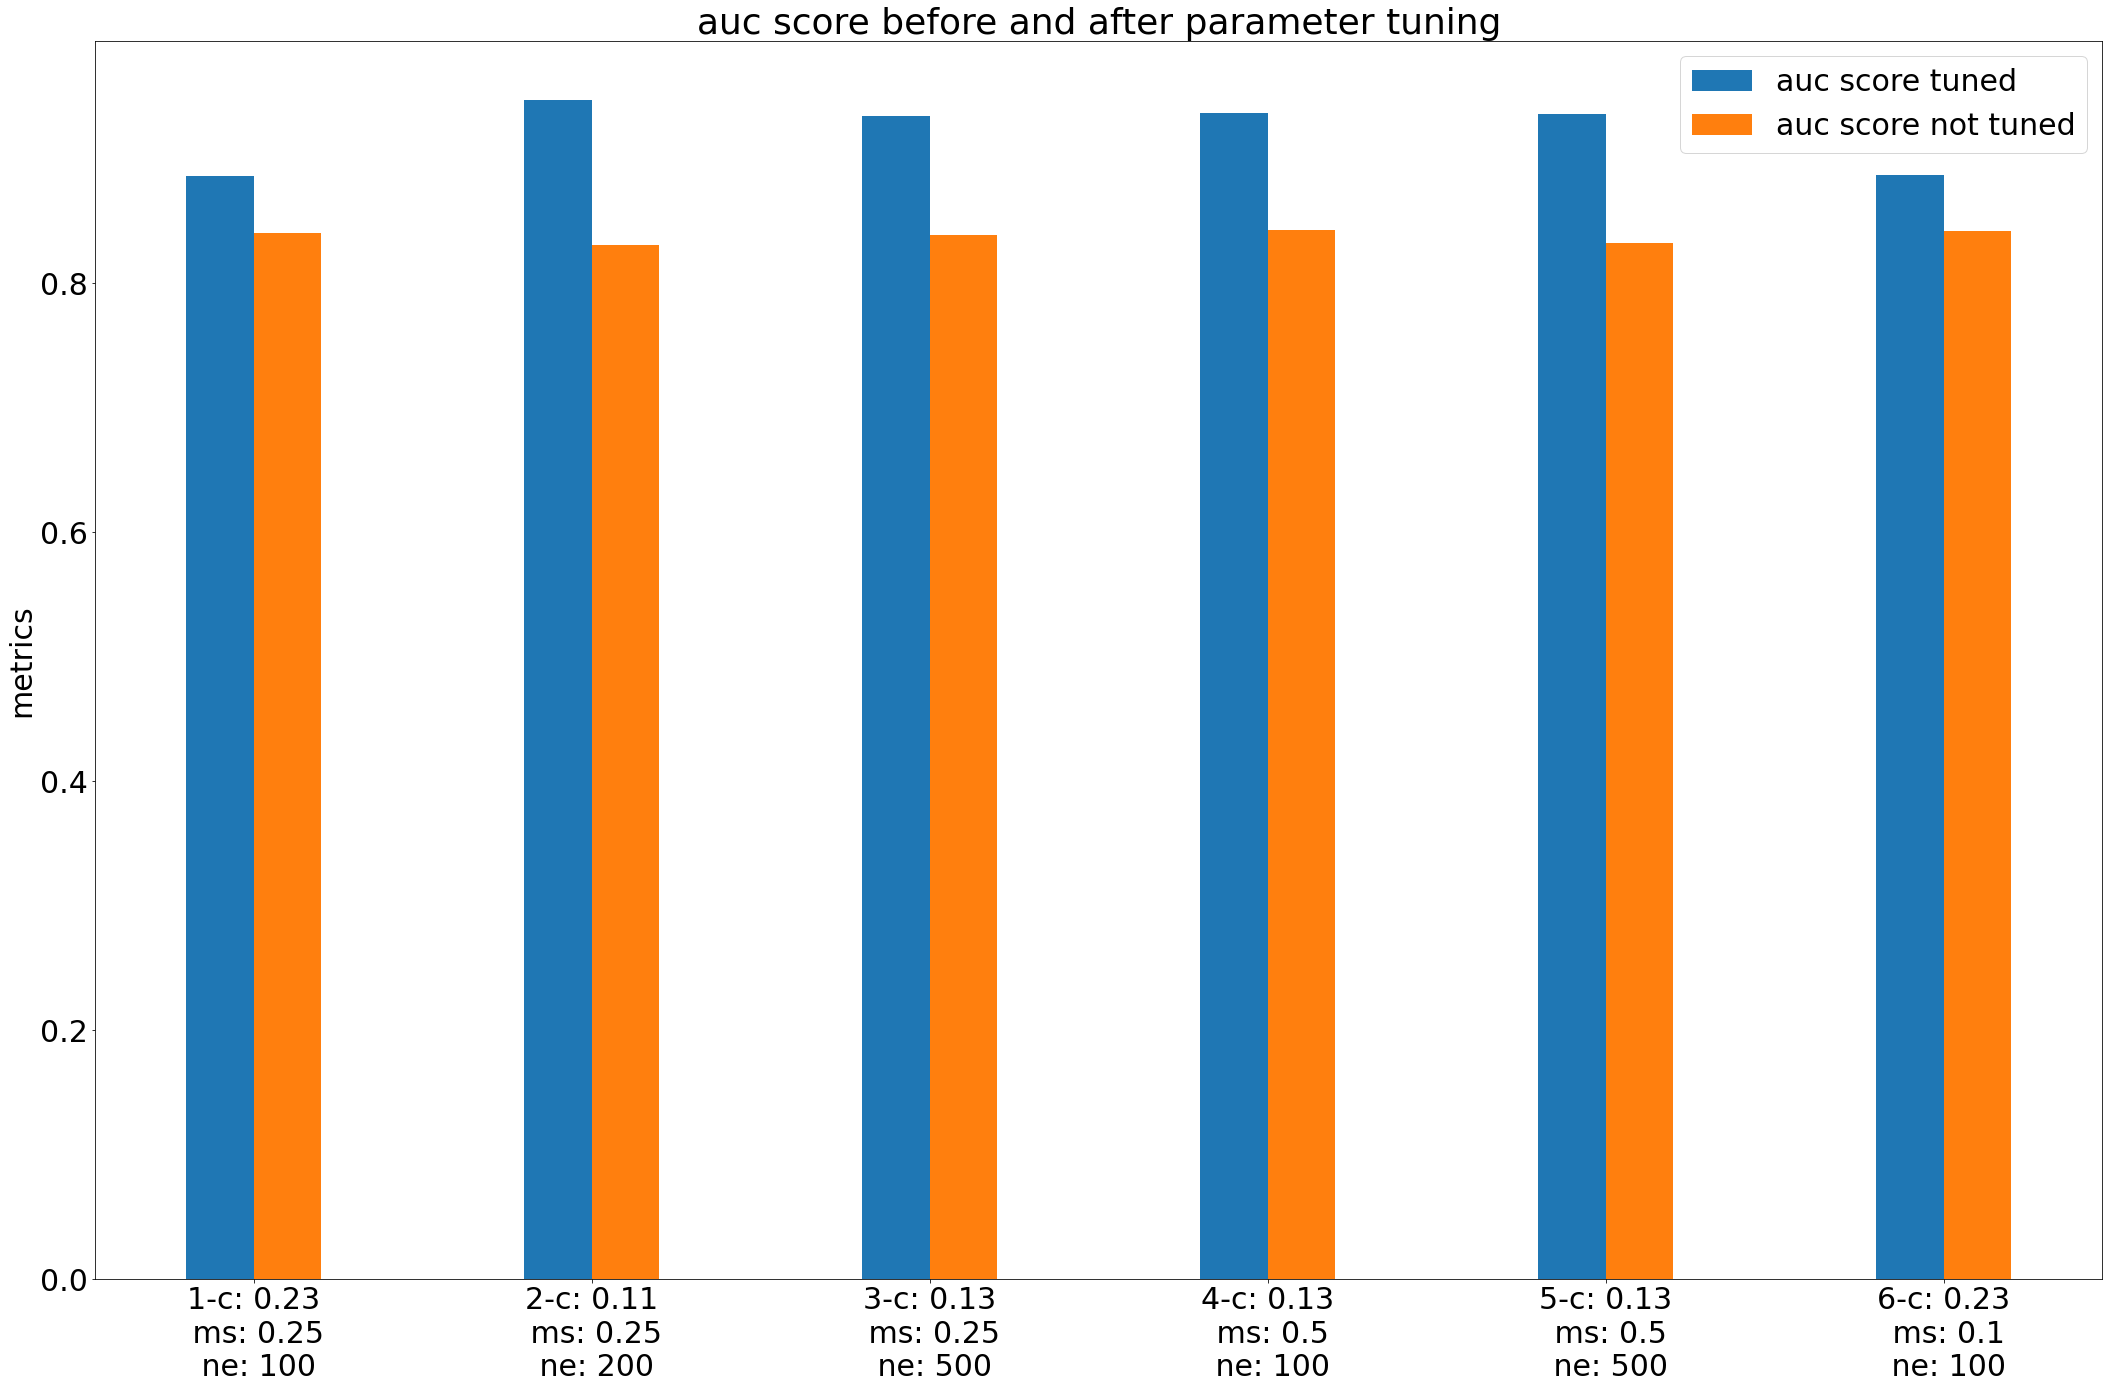

In [30]:
fig, ax = plt.subplots(figsize = (30,20))
plt.rc('font', size=30)

width = 1
labels = [f"{rs}-c: {c:.2}\n ms: {ms:.2}\n ne: {ne}" for rs, c, ms, ne in best_param]
ax.set_xticks([i*5 + width/2 for i in range(len(auc_tuned))])
ax.set_xticklabels(labels)
ax.set_ylabel('metrics')

ax.set_title('auc score before and after parameter tuning')

ax.bar([i*5 for i in range(len(auc_tuned))], auc_tuned, width=width)
ax.bar([i*5 + width for i in range(len(auc_not_tuned))], auc_not_tuned, width=width)
fig.tight_layout()
ax.legend(['auc score tuned', 'auc score not tuned'])
plt.savefig("IF_graph_auc_sf_20p.png", dpi=100)
plt.show()

In [20]:
import statistics 
m = statistics.mean(auc_tuned)
s = statistics.stdev(auc_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(f1_tuned)
s = statistics.stdev(f1_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(r_tuned)
s = statistics.stdev(r_tuned)
print(f"{m} \pm {s}")

0.9213497196924398 \pm 0.02730330726862587
0.06391021943076132 \pm 0.01798720168288076
0.9213497196924398 \pm 0.02730330726862593


# 50%

anomaly rate is 0.5% out of 351532 records
Finished trainning in 0:00:12.296374 seconds
contamination: 0.05 	 tp: 318/support: 384/predicted: 4390 -> fp = 4072
AUC : 89.1% 	 precision: 0.0724 	 recall: 0.828 	 f1: 0.5545108272606183
--------------------
Finished trainning in 0:00:12.395573 seconds
contamination: 0.07 	 tp: 318/support: 384/predicted: 6100 -> fp = 5782
AUC : 88.1% 	 precision: 0.0521 	 recall: 0.828 	 f1: 0.5317708472990993
--------------------
Finished trainning in 0:00:12.336642 seconds
contamination: 0.09000000000000001 	 tp: 320/support: 384/predicted: 7970 -> fp = 7650
AUC : 87.3% 	 precision: 0.0402 	 recall: 0.833 	 f1: 0.515266033863715
--------------------
Finished trainning in 0:00:12.325167 seconds
contamination: 0.11000000000000001 	 tp: 320/support: 384/predicted: 9666 -> fp = 9346
AUC : 86.3% 	 precision: 0.0331 	 recall: 0.833 	 f1: 0.5034488483503936
--------------------
Finished trainning in 0:00:12.317651 seconds
contamination: 0.13 	 tp: 383/support: 

<ipython-input-11-21337a0e1590>:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


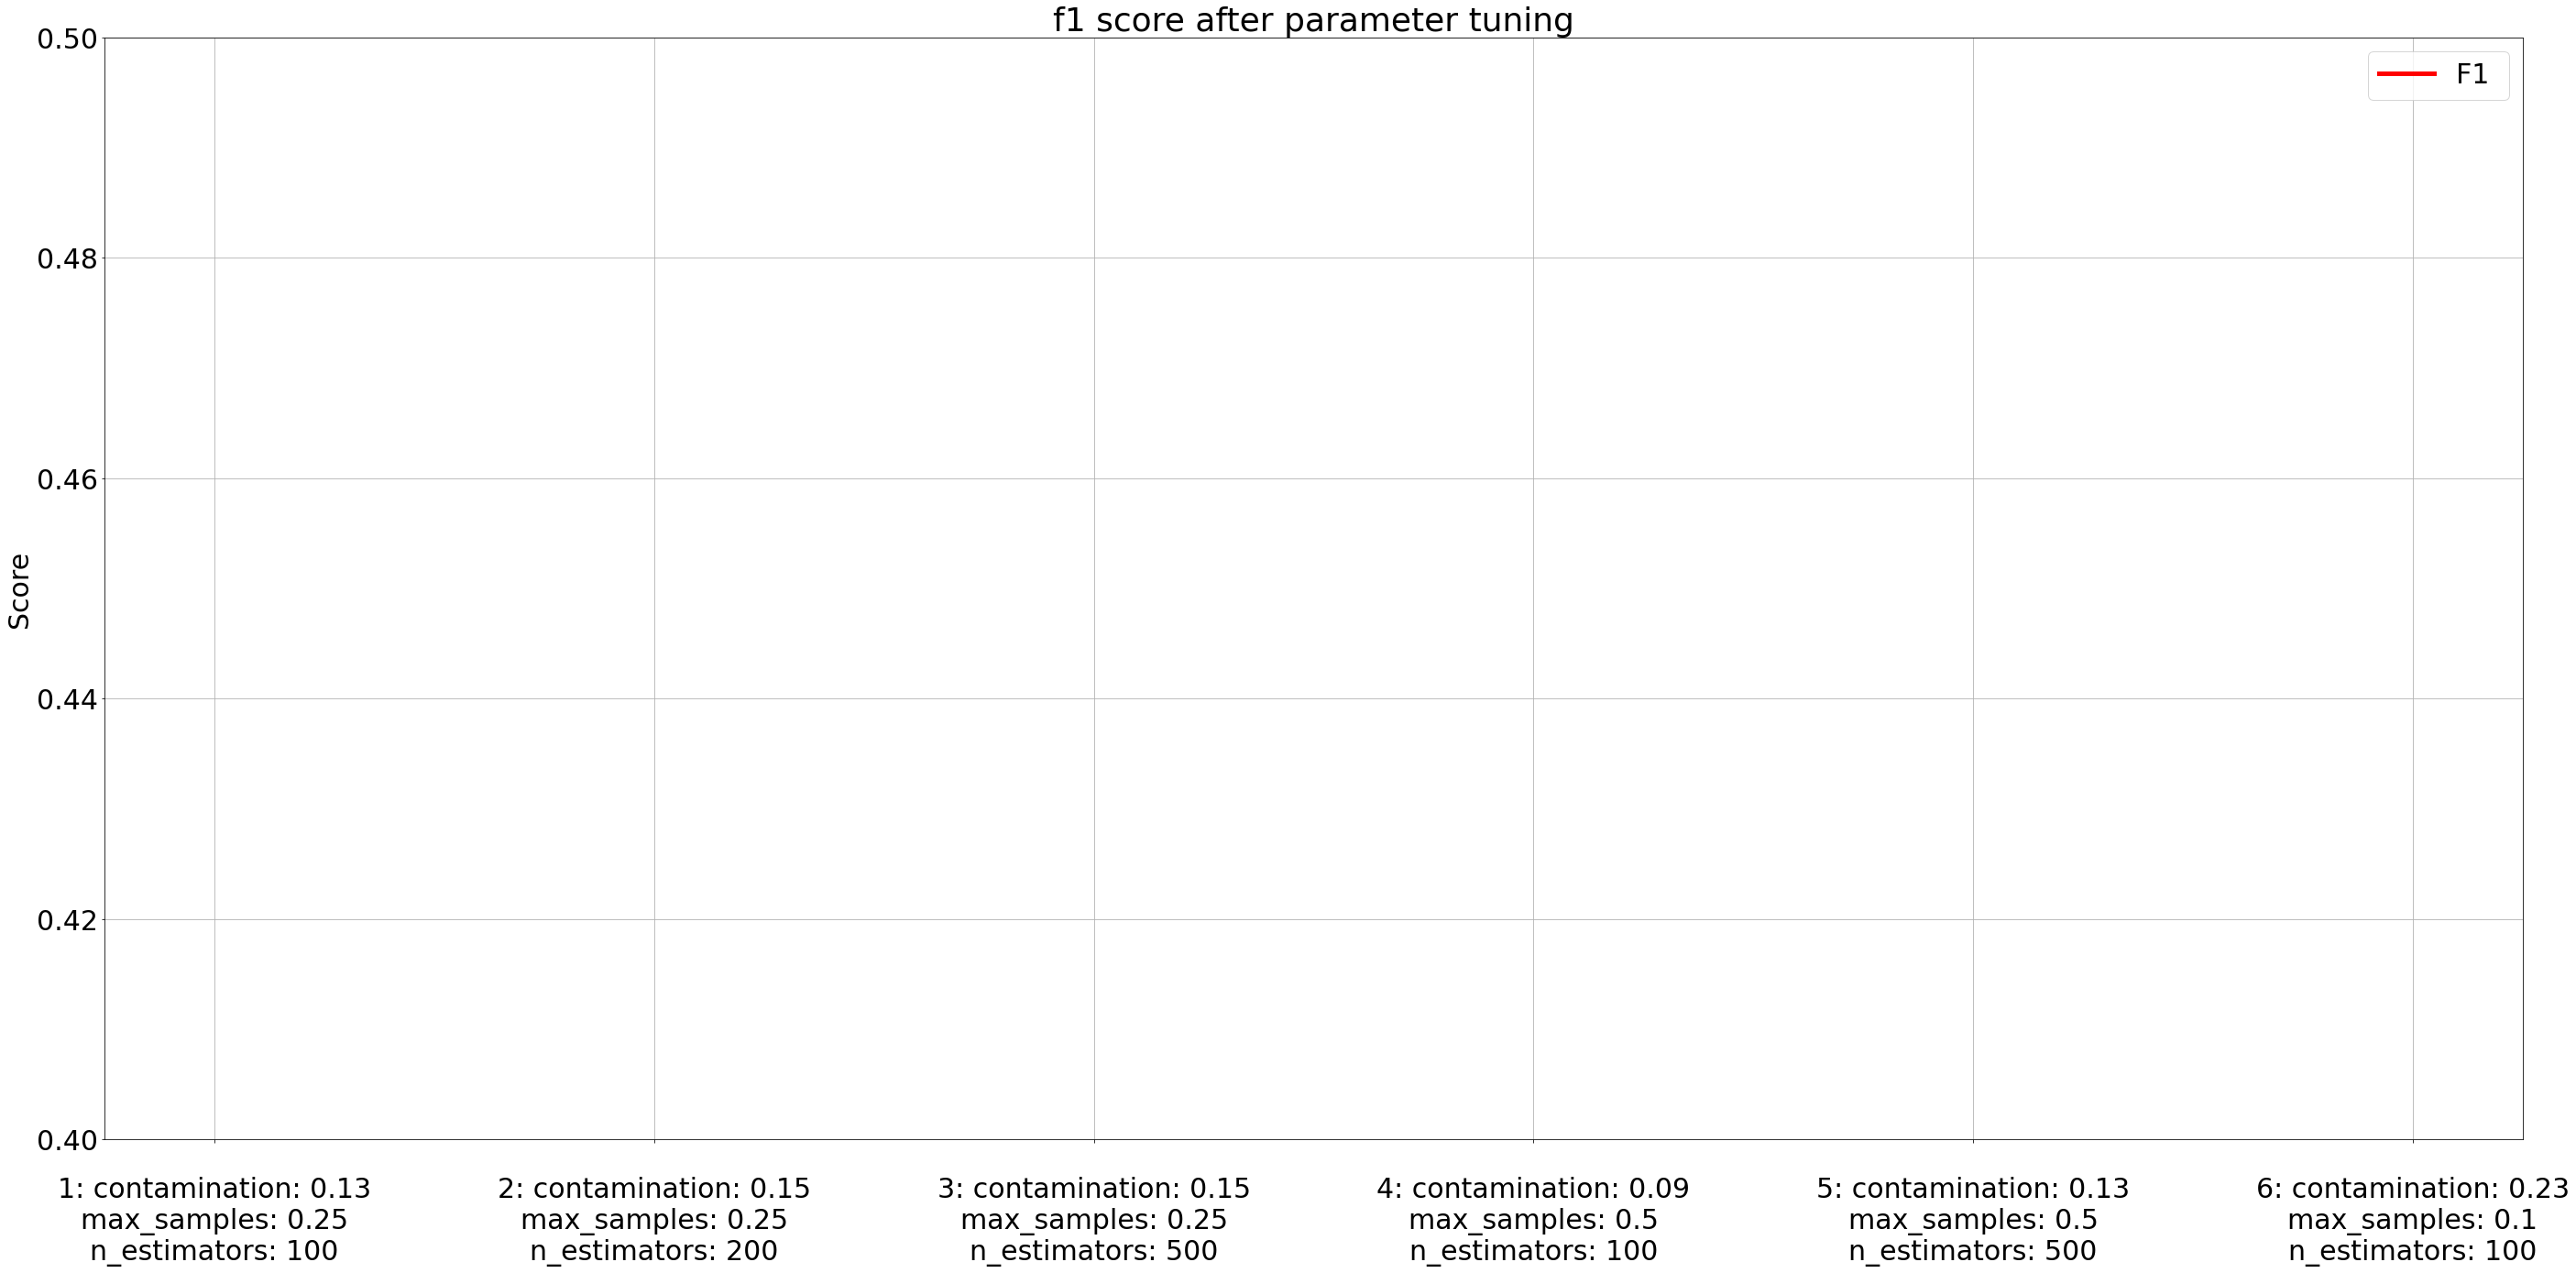

<ipython-input-11-21337a0e1590>:194: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


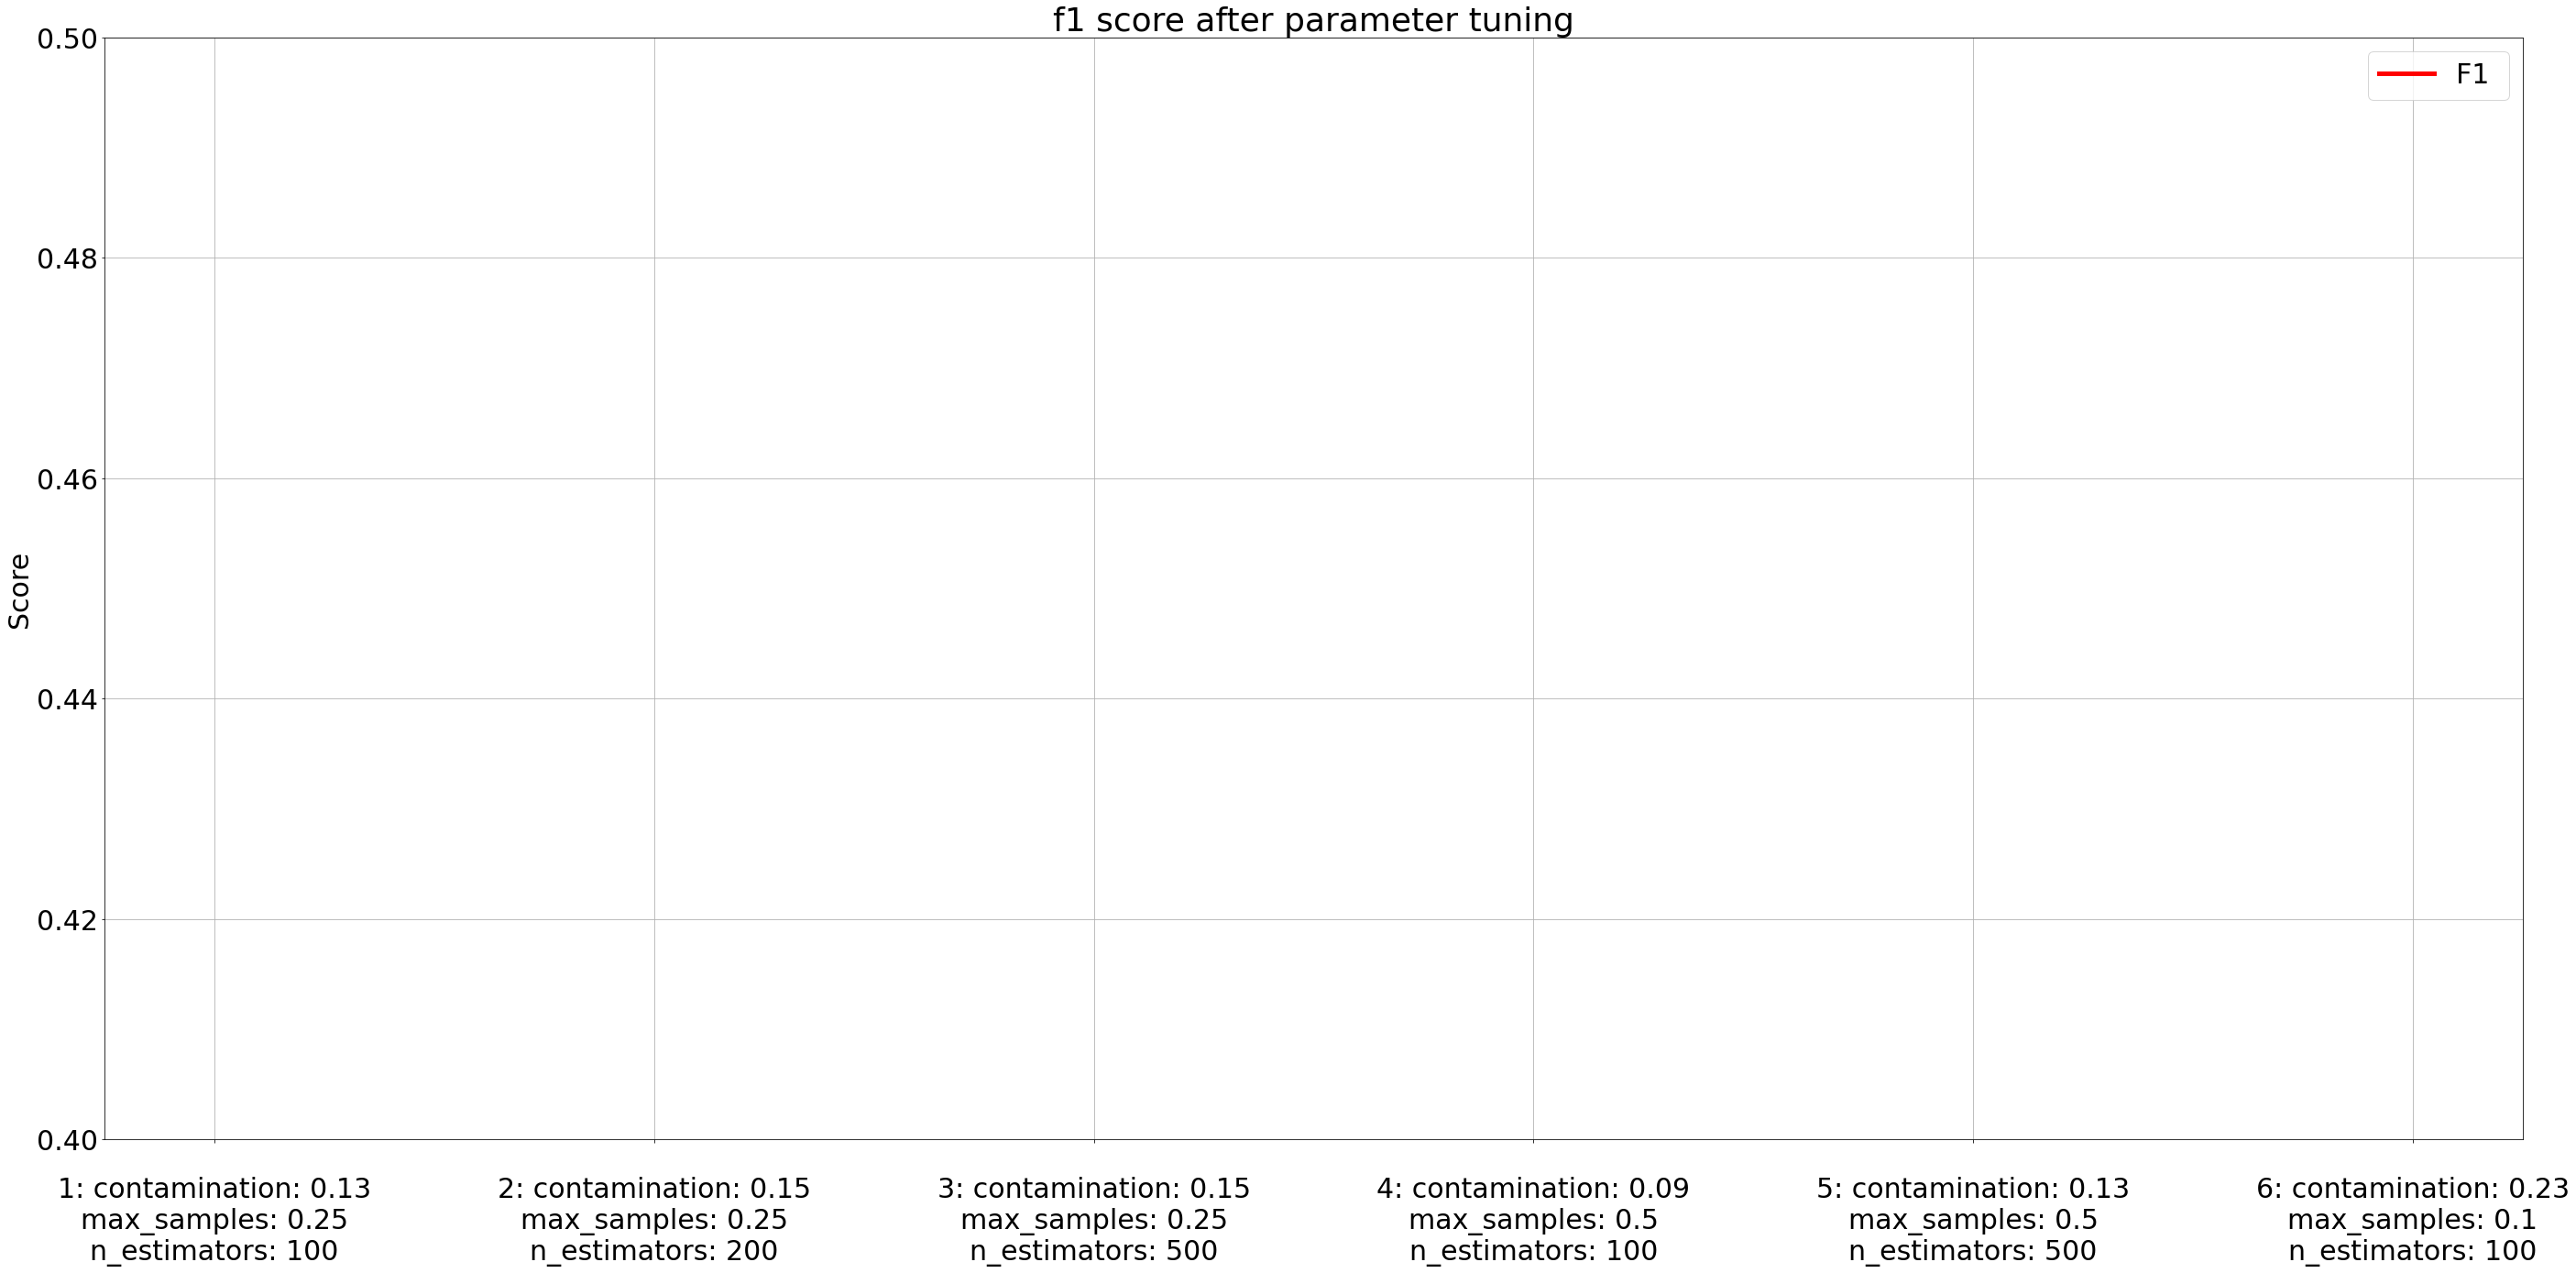

---[1, 0.13, 0.25, 100]
Time for IF fitting: 12.330
---0.06473421786529197
---0.9354629082665707
---0.9354629082665706
---0.12901701323251416
---[2, 0.15000000000000002, 0.25, 200]
Time for IF fitting: 24.465
---0.06298979742717728
---0.9263754631569566
---0.9263754631569566
---0.14356884057971014
---[3, 0.15000000000000002, 0.25, 500]
Time for IF fitting: 60.815
---0.06740746191772758
---0.9264362976360221
---0.9264362976360221
---0.15108892921960074
---[4, 0.09000000000000001, 0.5, 100]
Time for IF fitting: 13.661
---0.09816690786300047
---0.950024290583475
---0.950024290583475
---0.13636363636363638
---[5, 0.13, 0.5, 500]
Time for IF fitting: 67.026
---0.06890699253224712
---0.9360628701190684
---0.9360628701190684
---0.13167013167013167
---[6, 0.23000000000000004, 0.1, 100]
Time for IF fitting: 10.634
---0.03775416120735673
---0.8841349528427472
---0.8841349528427473
---0.1320178529480855


In [11]:
def cross_validation(contamination, max_samples, n_estimators, random_state, silent=True):
    highest_score = 0
    highest_score_c = 0
    for c in contamination:
        s = datetime.datetime.now()
        y_pred = IsolationForest(random_state= random_state, n_jobs=-1, max_samples = max_samples, n_estimators = n_estimators, contamination=c).fit(x_train).predict(x_test)
        t = datetime.datetime.now() - s
        p, r, f, s = map(lambda x: x[0], precision_recall_fscore_support(y_test, y_pred, labels=[-1]))
        # p = tp / (tp + fp)
        f = f1_score(y_test, y_pred, average = "macro")
        r = recall_score(y_test, y_pred, pos_label = -1)
        a = roc_auc_score(y_test, y_pred)
        if f + r > highest_score: highest_score = f + r; highest_score_c = c
        
        yp = np.array(y_pred)
        yt = np.array(y_test)
        
        prediction = yp[np.where(yt == -1)]

        tp = len(yp[np.where(prediction == -1)])
        
        fp = tp / p - tp
        # predicted true
        positives = yp[np.where(yp == -1)]
        if not silent:
            print(f"Finished trainning in {t} seconds")
            print(f"contamination: {c} \t tp: {tp}/support: {s}/predicted: {len(positives)} -> fp = {len(positives) - tp}")
            print(f"AUC : {a:.1%} \t precision: {p:.3} \t recall: {r:.3} \t f1: {f}")
            print("--------------------")
    return (highest_score_c, y_pred, f, len(positives) - tp, tp, p, r, t)

frac = 0.5

dfSF = dfsf_normal.sample(frac = frac, random_state = 1).append(dfsf_attack.sample(frac = frac, random_state = 1))

anomaly_rate = 1.0 - len(dfSF.loc[dfSF["target"]=='normal.'])/len(dfSF)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfSF)} records")

dfSF['binary_target'] = [1 if x=='normal.' else -1 for x in dfSF["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfSF[f] = leSF.fit_transform(dfSF[f])

Y_axis_f1 = []
Y_axis_recall = []
Y_axis_auc = []
best_param = []

rs = 1
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=False)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
Y_axis_auc.append(roc_auc_score(y_test, y_pred))
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 2
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 200

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 3
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 4
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 5
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 6
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.1
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_F1.png", dpi=100)

plt.show()

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_AUC.png", dpi=100)

plt.show()

# Comparison against default values

f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []

for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.045, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))

In [31]:
f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []

best_param = [(1, 0.13, 0.25, 100), (2, 0.15, 0.25, 200), (3, 0.15, 0.25, 500), (4, 0.09, 0.5, 100), (5, 0.13, 0.5, 500), (6, 0.23, 0.1, 100)]
for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.045, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))

---[1, 0.13, 0.25, 100]
Time for IF fitting: 26.675
---0.05798567214496419
---0.8450953021264289
---0.8450953021264287
---0.14278993178075747
---[2, 0.15, 0.25, 200]
Time for IF fitting: 53.205
---0.0633430651539229
---0.9275484534903664
---0.9275484534903664
---0.13915857605177995
---[3, 0.15, 0.25, 500]
Time for IF fitting: 133.940
---0.061528283162421434
---0.9252409882816424
---0.9252409882816424
---0.13731275533363596
---[4, 0.09, 0.5, 100]
Time for IF fitting: 29.530
---0.08674382531917432
---0.8744620035477038
---0.8744620035477038
---0.1437016825829923
---[5, 0.13, 0.5, 500]
Time for IF fitting: 149.180
---0.0704558910597987
---0.9359836999451352
---0.9359836999451352
---0.13467244921250857
---[6, 0.23, 0.1, 100]
Time for IF fitting: 23.478
---0.042711551090895826
---0.8869134461560031
---0.886913446156003
---0.14395306859205775


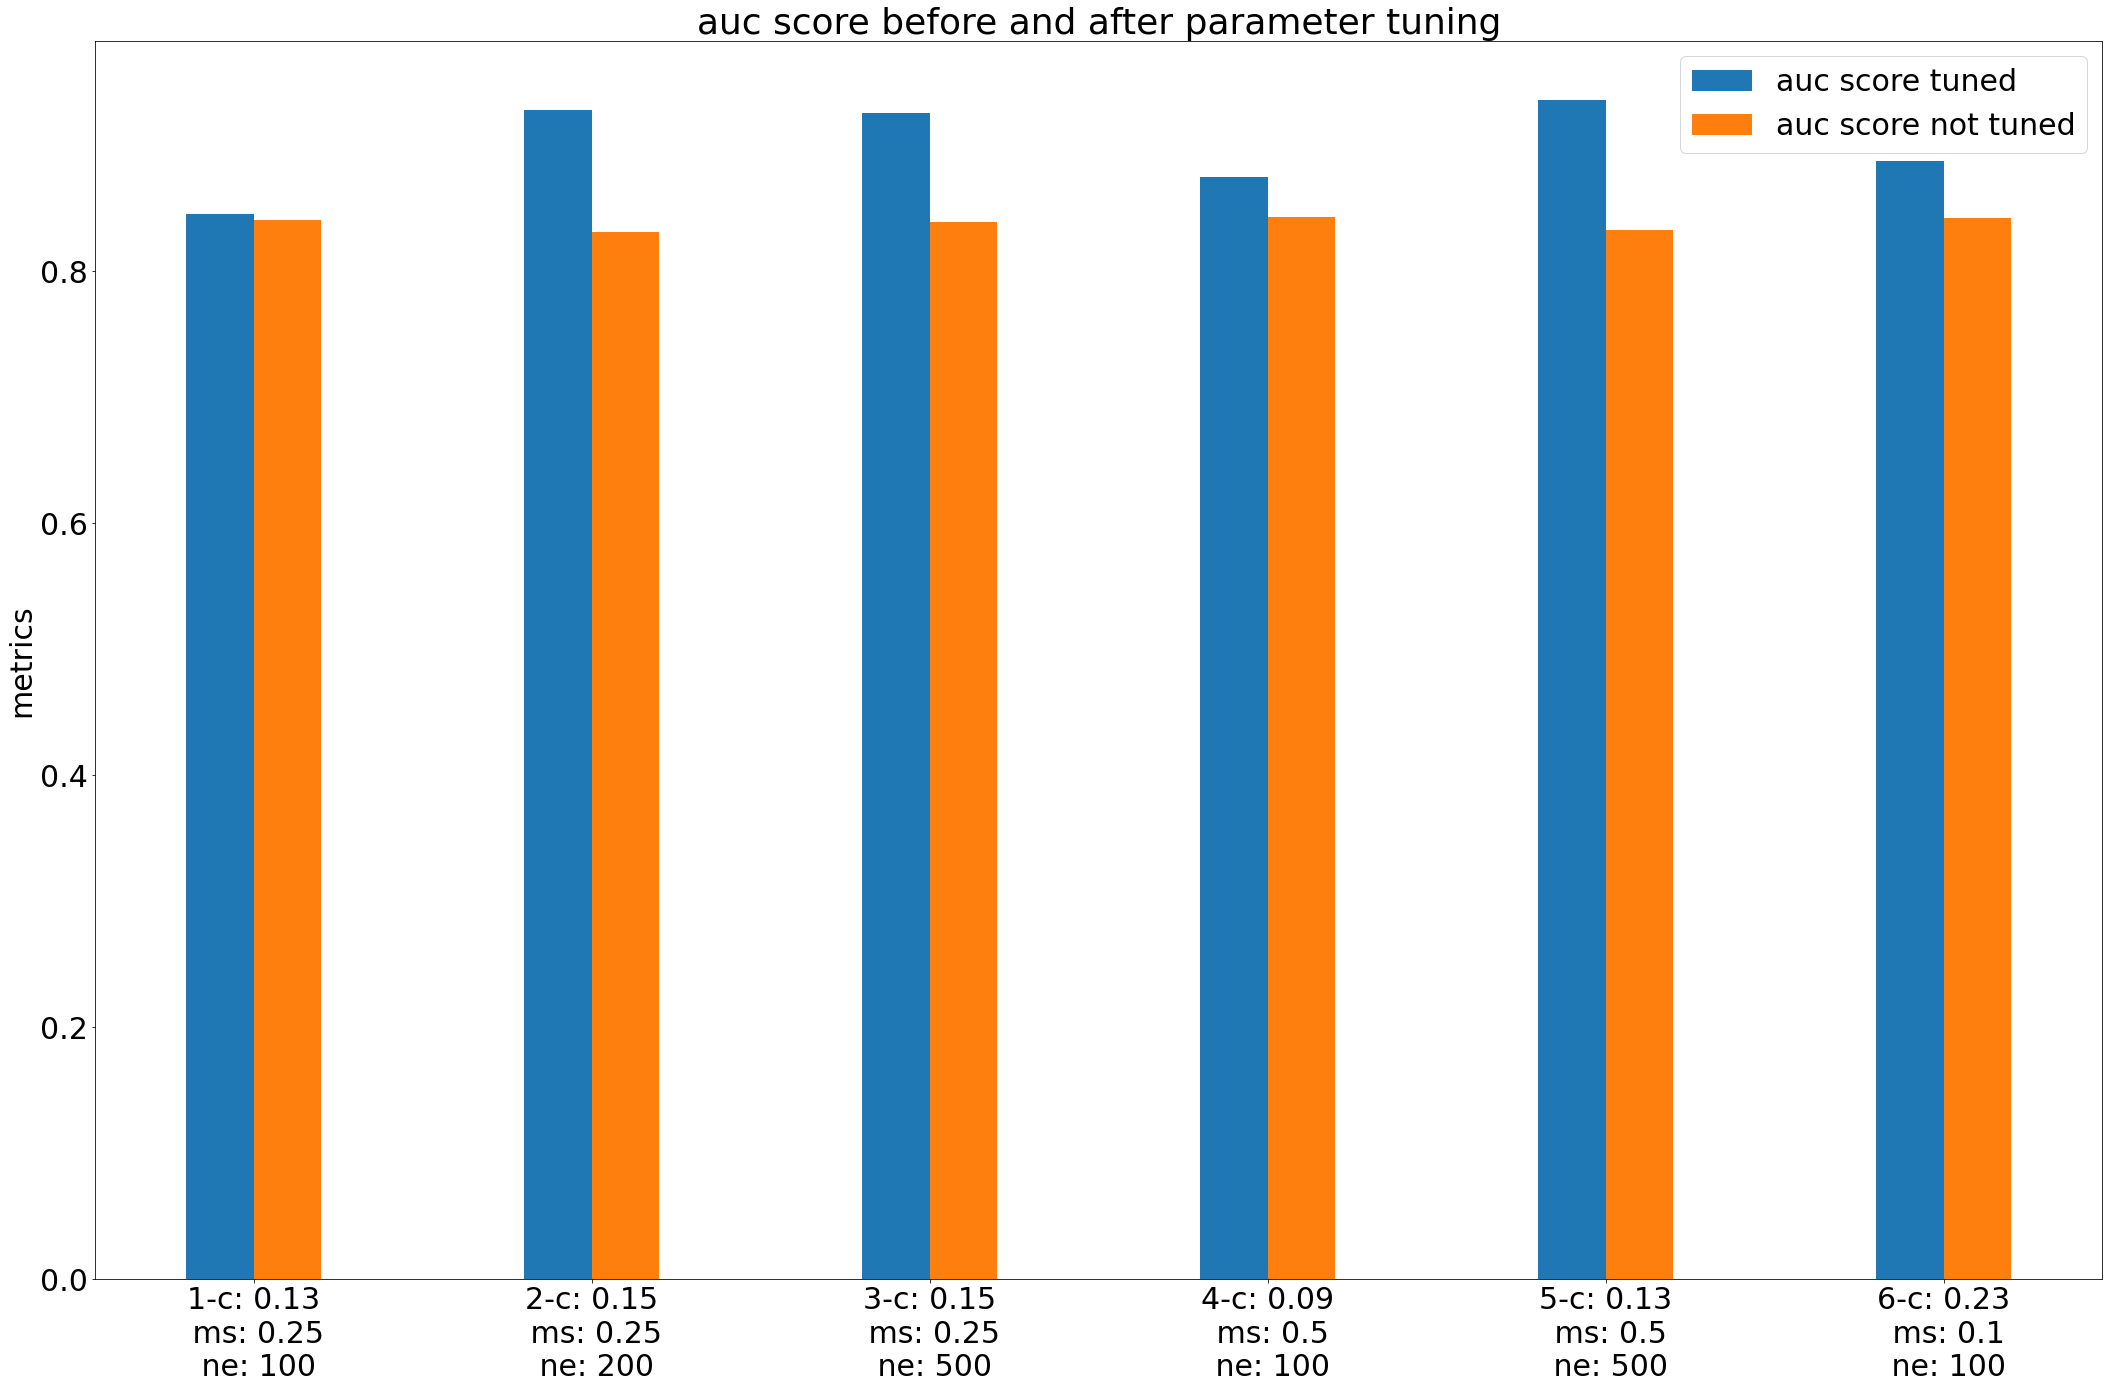

0.8992073155912133 \pm 0.03612493419330271
0.06379471465519623 \pm 0.014523211842487975
0.8992073155912133 \pm 0.03612493419330278


In [32]:
fig, ax = plt.subplots(figsize = (30,20))
plt.rc('font', size=30)

width = 1
labels = [f"{rs}-c: {c:.2}\n ms: {ms:.2}\n ne: {ne}" for rs, c, ms, ne in best_param]
ax.set_xticks([i*5 + width/2 for i in range(len(auc_tuned))])
ax.set_xticklabels(labels)
ax.set_ylabel('metrics')

ax.set_title('auc score before and after parameter tuning')

ax.bar([i*5 for i in range(len(auc_tuned))], auc_tuned, width=width)
ax.bar([i*5 + width for i in range(len(auc_not_tuned))], auc_not_tuned, width=width)
fig.tight_layout()
ax.legend(['auc score tuned', 'auc score not tuned'])
plt.savefig("IF_graph_auc_sf_50p.png", dpi=100)
plt.show()

import statistics 
m = statistics.mean(auc_tuned)
s = statistics.stdev(auc_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(f1_tuned)
s = statistics.stdev(f1_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(r_tuned)
s = statistics.stdev(r_tuned)
print(f"{m} \pm {s}")

# 70%

anomaly rate is 0.5% out of 492146 records
Finished trainning in 0:00:17.359944 seconds
contamination: 0.05 	 tp: 465/support: 567/predicted: 6151 -> fp = 5686
AUC : 88.7% 	 precision: 0.0756 	 recall: 0.82 	 f1: 0.5571262519595787
--------------------
Finished trainning in 0:00:17.304282 seconds
contamination: 0.07 	 tp: 465/support: 567/predicted: 8548 -> fp = 8083
AUC : 87.7% 	 precision: 0.0544 	 recall: 0.82 	 f1: 0.5337438904657207
--------------------
Finished trainning in 0:00:17.350396 seconds
contamination: 0.09000000000000001 	 tp: 467/support: 567/predicted: 10983 -> fp = 10516
AUC : 86.9% 	 precision: 0.0425 	 recall: 0.824 	 f1: 0.5177998223683954
--------------------
Finished trainning in 0:00:17.344571 seconds
contamination: 0.11000000000000001 	 tp: 470/support: 567/predicted: 13574 -> fp = 13104
AUC : 86.1% 	 precision: 0.0346 	 recall: 0.829 	 f1: 0.504778037949604
--------------------
Finished trainning in 0:00:17.261469 seconds
contamination: 0.13 	 tp: 470/support

<ipython-input-13-7f7692491d69>:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


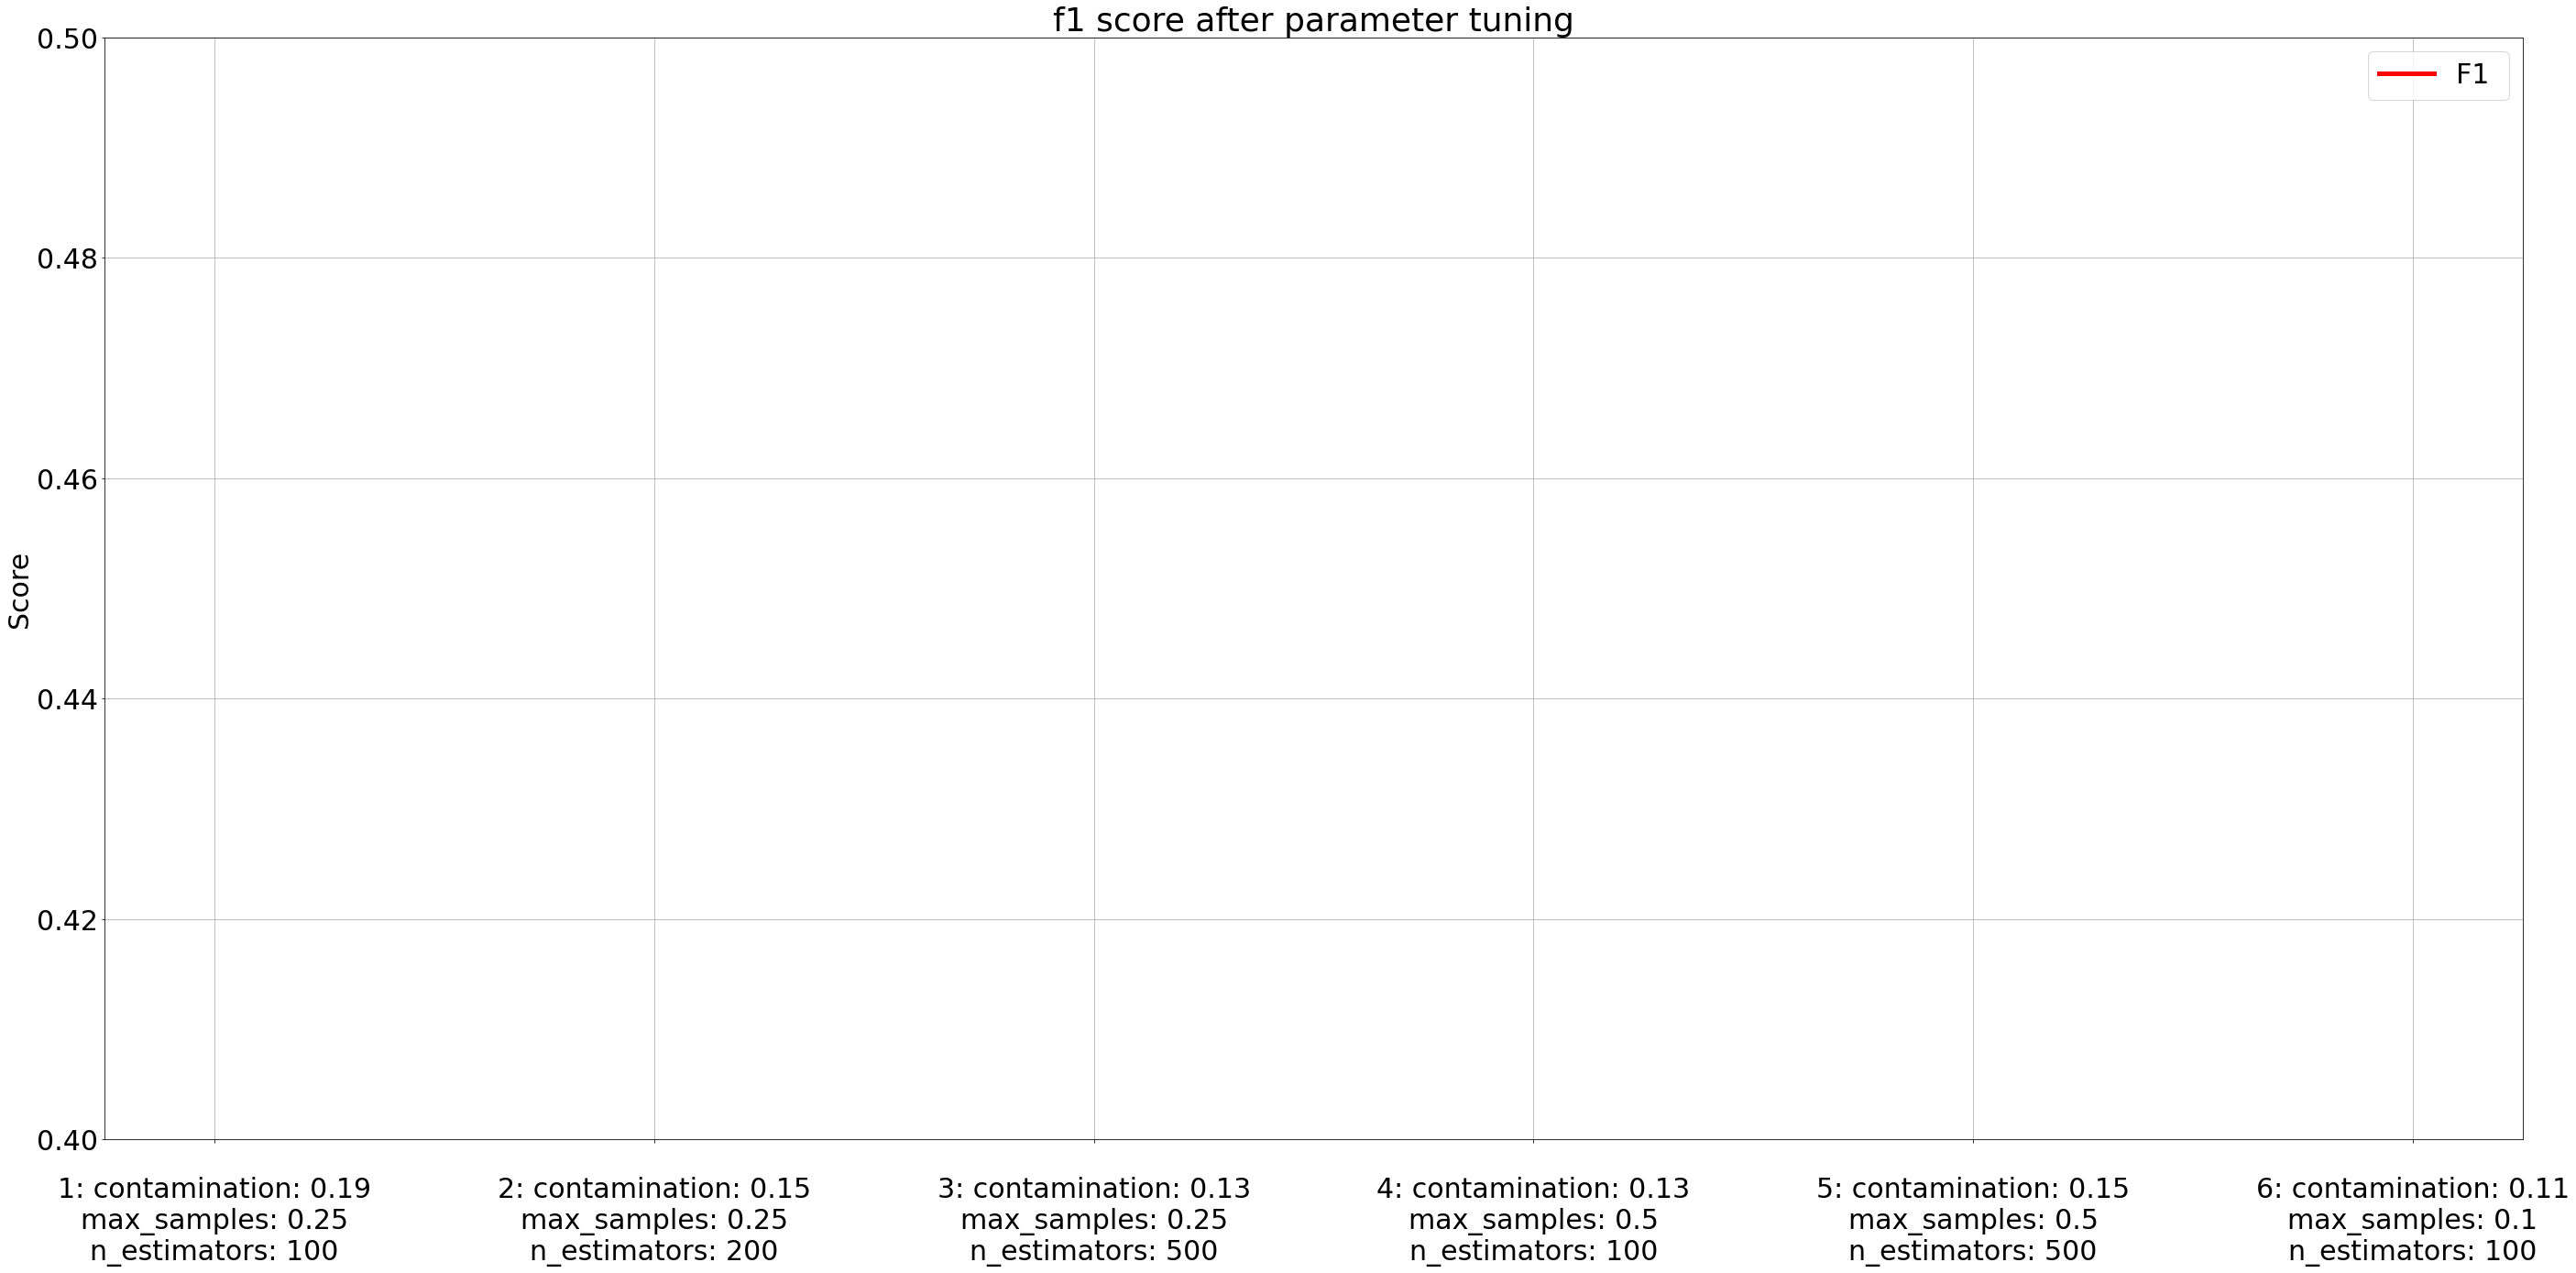

<ipython-input-13-7f7692491d69>:143: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


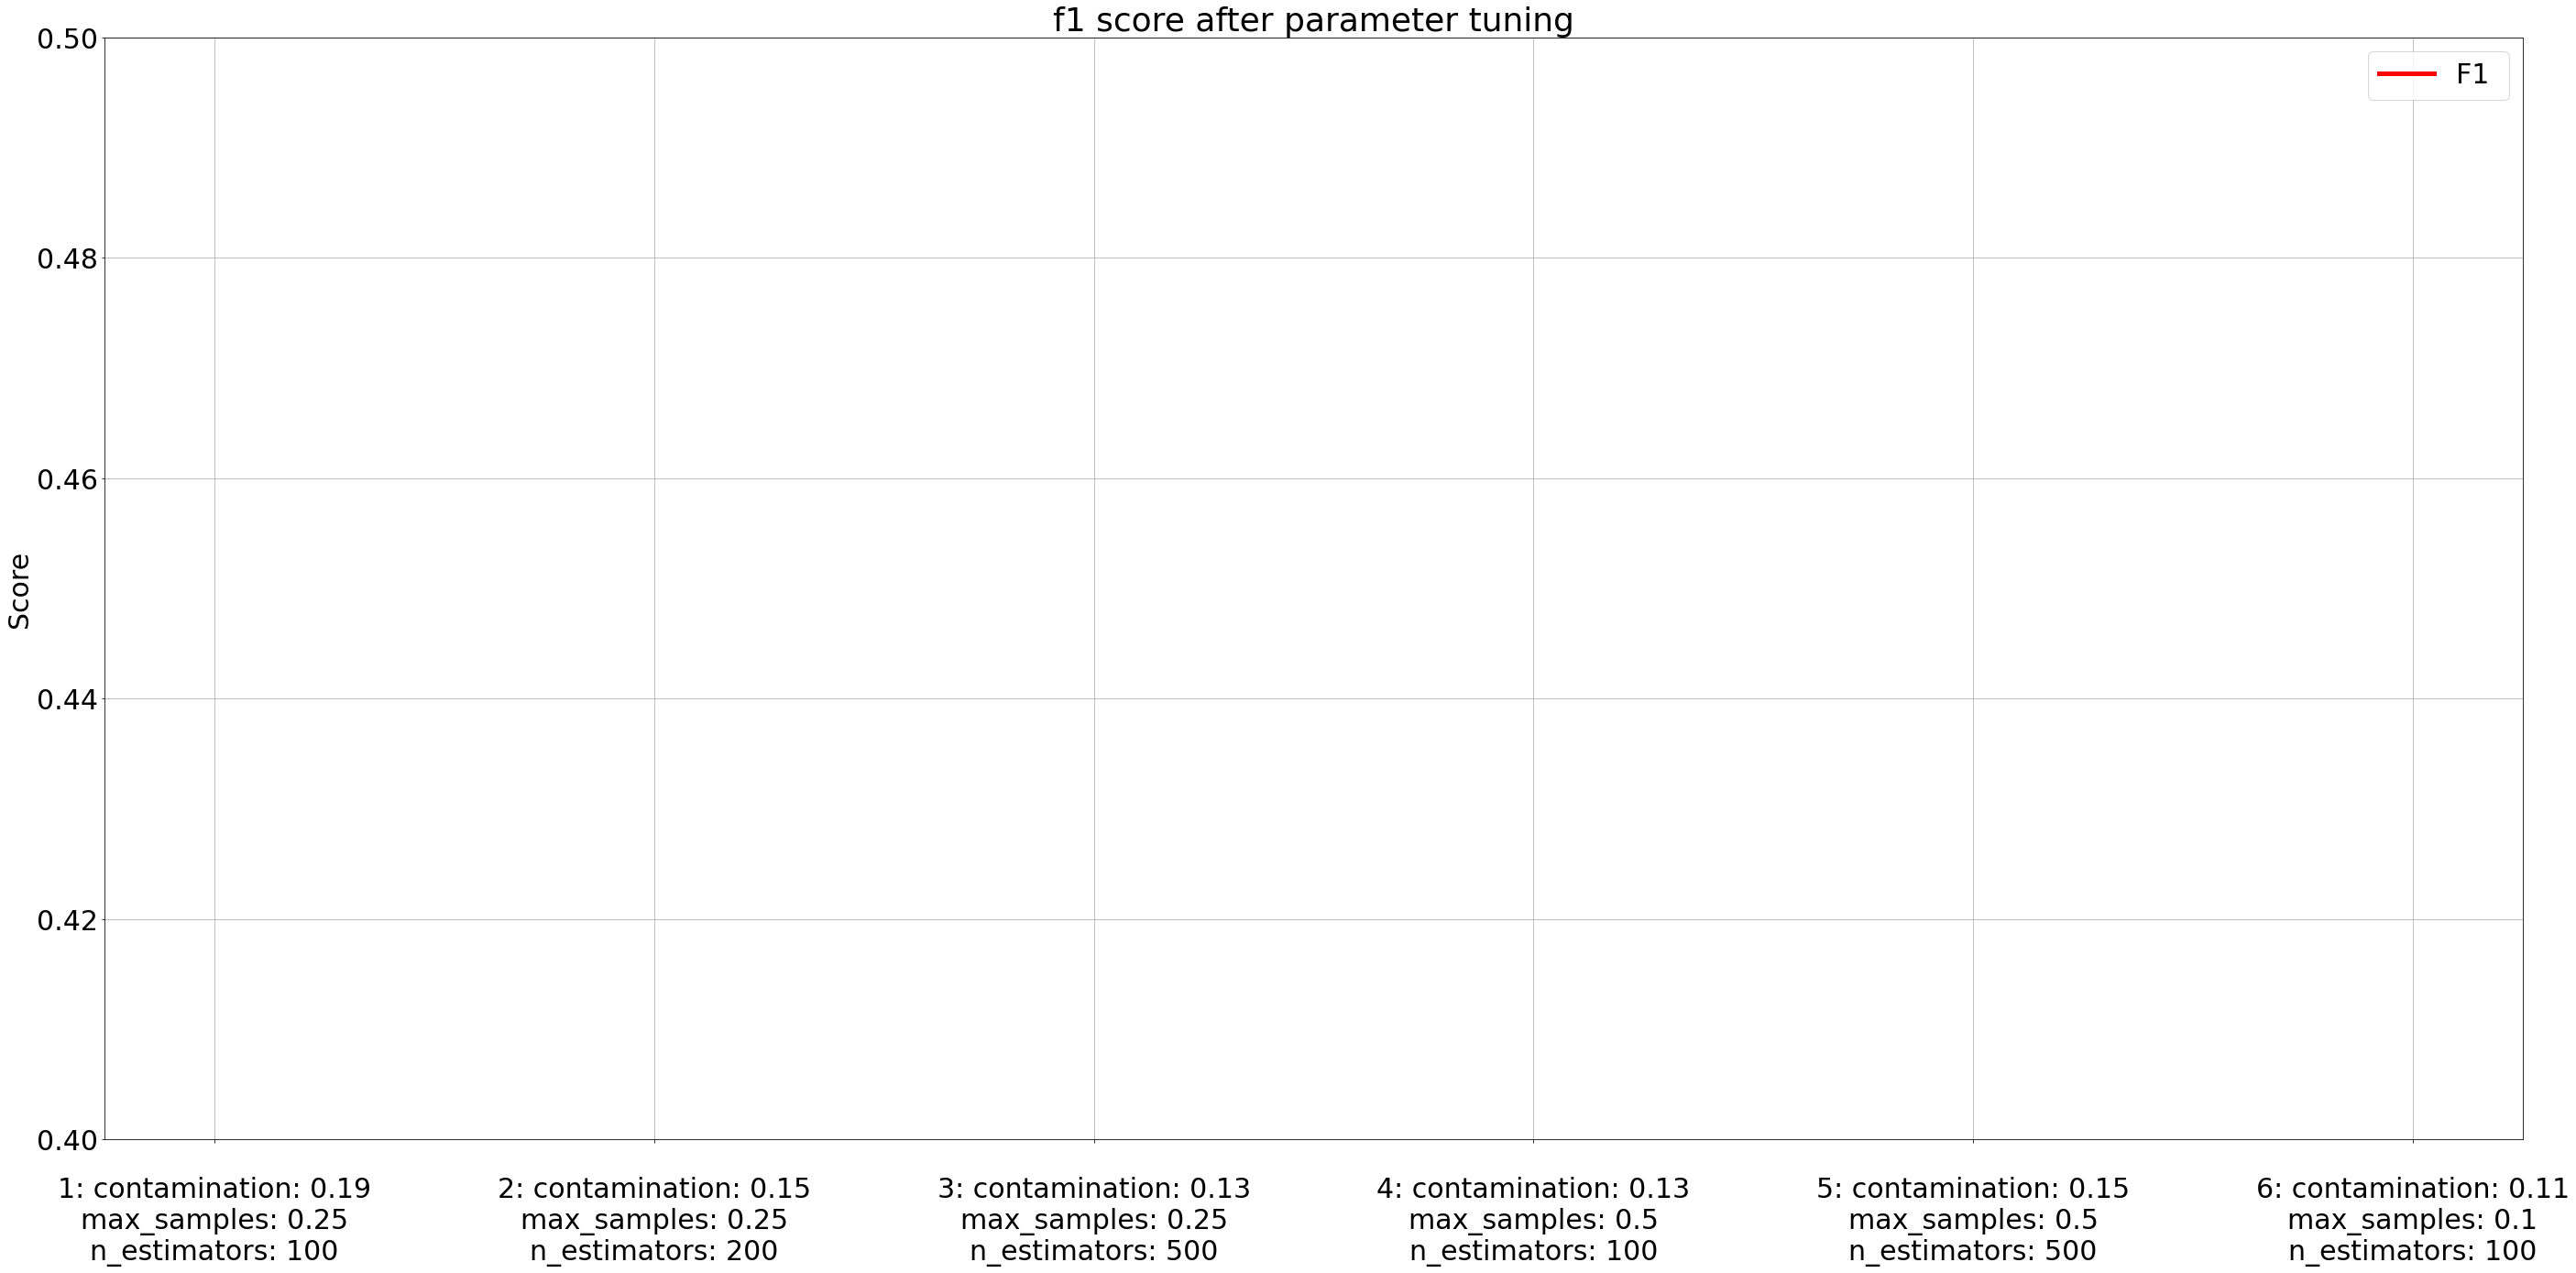

---[1, 0.19, 0.25, 100]
Time for IF fitting: 17.360
---0.04738979361158789
---0.9062219463025103
---0.9062219463025103
---0.13531137919791328
---[2, 0.15000000000000002, 0.25, 200]
Time for IF fitting: 34.541
---0.06102487773761428
---0.9261511346242659
---0.9261511346242659
---0.13866039952996476
---[3, 0.13, 0.25, 500]
Time for IF fitting: 87.185
---0.07236083287804286
---0.9342794797868835
---0.9342794797868836
---0.13844870725604674
---[4, 0.13, 0.5, 100]
Time for IF fitting: 19.369
---0.07152900898697807
---0.9362915225280561
---0.9362915225280561
---0.14066369489846456
---[5, 0.15000000000000002, 0.5, 500]
Time for IF fitting: 97.652
---0.06109037379738183
---0.927079930750637
---0.927079930750637
---0.133442088091354
---[6, 0.11000000000000001, 0.1, 100]
Time for IF fitting: 16.074
---0.08322771440642164
---0.9434869591488284
---0.9434869591488284
---0.1404234994427639


In [13]:
frac = 0.7

dfSF = dfsf_normal.sample(frac = frac, random_state = 1).append(dfsf_attack.sample(frac = frac, random_state = 1))

anomaly_rate = 1.0 - len(dfSF.loc[dfSF["target"]=='normal.'])/len(dfSF)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfSF)} records")

dfSF['binary_target'] = [1 if x=='normal.' else -1 for x in dfSF["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfSF[f] = leSF.fit_transform(dfSF[f])

Y_axis_f1 = []
Y_axis_recall = []
Y_axis_auc = []
best_param = []

rs = 1
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=False)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
Y_axis_auc.append(roc_auc_score(y_test, y_pred))
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 2
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 200

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 3
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 4
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 5
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 6
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.1
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_F1.png", dpi=100)

plt.show()

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_AUC.png", dpi=100)

plt.show()

# Comparison against default values

f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []

for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, average = 'macro')
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.045, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, average = 'macro')
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))

In [45]:
f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []
best_param = [(1, 0.19, 0.25, 100), (2, 0.15, 0.25, 200), (3, 0.13, 0.25, 500), (4, 0.13, 0.5, 100), (5, 0.15, 0.5, 500), (6, 0.11, 0.1, 100)]
for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, average = 'macro')
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.005, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, average = 'macro')
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))
    

---[1, 0.19, 0.25, 100]
Time for IF fitting: 26.622
---0.46831461739543573
---0.8156219547094666
---0.8156219547094665
---0.5135843998468108
---[2, 0.15, 0.25, 200]
Time for IF fitting: 53.414
---0.4926161353969014
---0.9275484534903664
---0.9275484534903664
---0.5181070157046416
---[3, 0.13, 0.25, 500]
Time for IF fitting: 133.805
---0.5016094661272067
---0.9346041899927235
---0.9346041899927235
---0.5231349865919696
---[4, 0.13, 0.5, 100]
Time for IF fitting: 29.492
---0.5032790572621331
---0.9367398210532978
---0.9367398210532978
---0.5156355095935065
---[5, 0.15, 0.5, 500]
Time for IF fitting: 148.383
---0.49107456320819404
---0.9256339640477581
---0.925633964047758
---0.5174580092337326
---[6, 0.11, 0.1, 100]
Time for IF fitting: 23.264
---0.5080225064917161
---0.8669784547044287
---0.8669784547044287
---0.5207653168920484


<ipython-input-46-1a8aea31aaf7>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


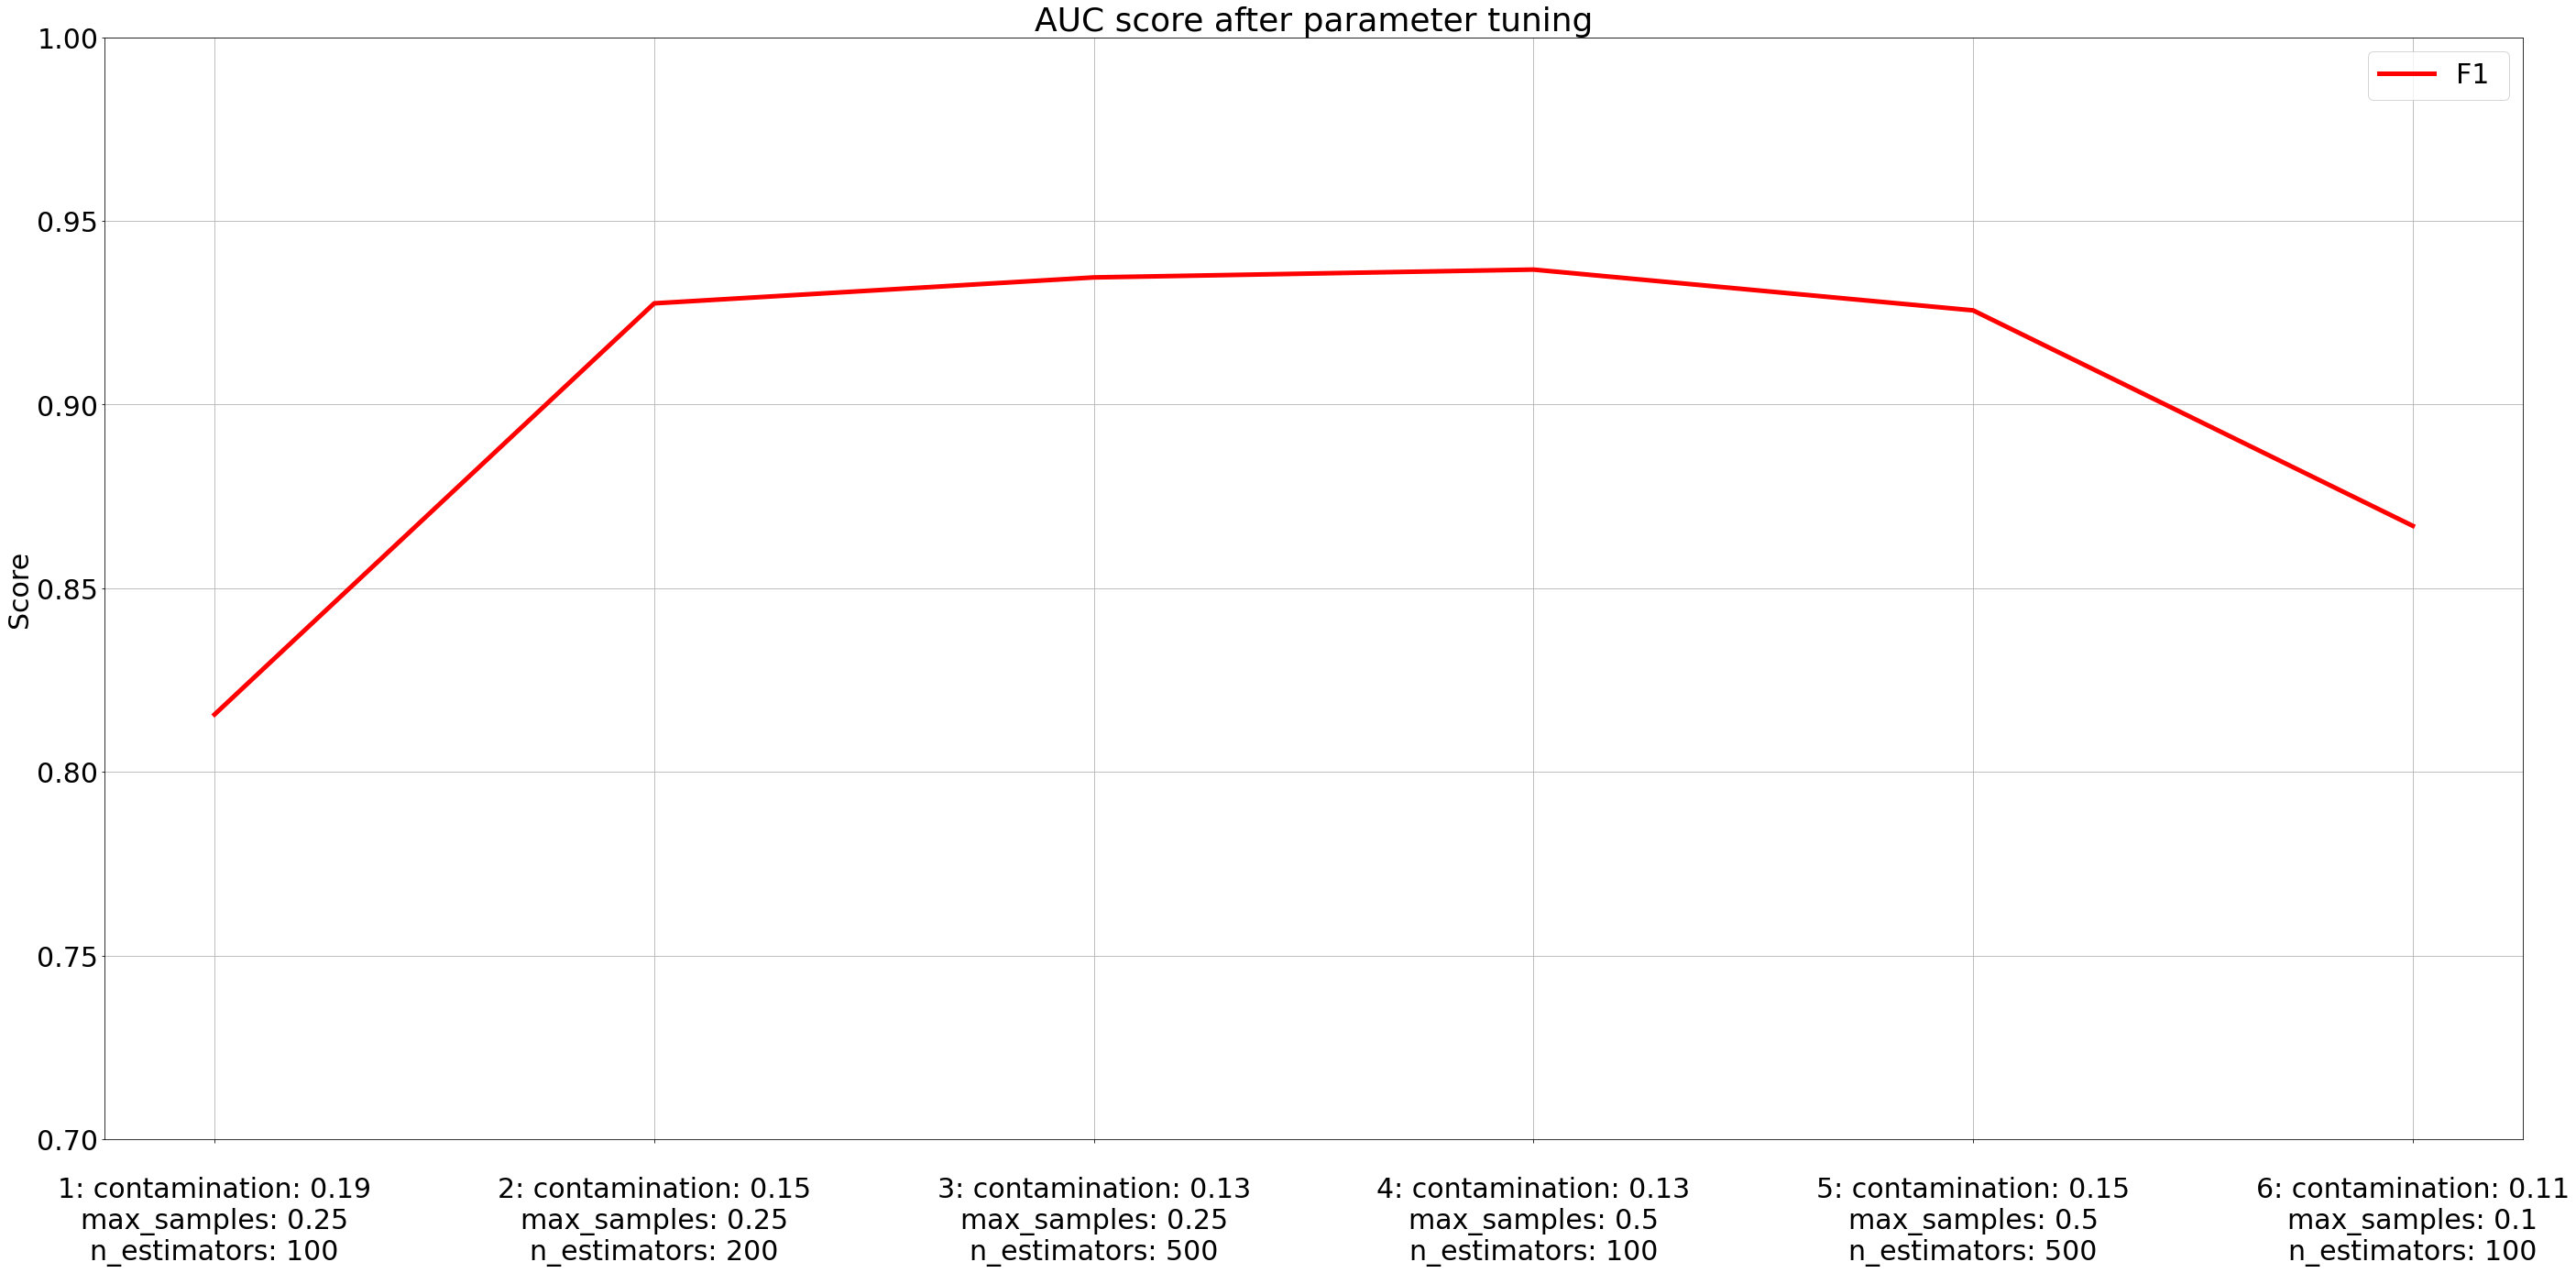

In [46]:
plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('AUC score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.7, 1.0)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'AUC'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)
Y_axis = auc_tuned

ax.plot(X_axis, Y_axis, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_F1_70p.png", dpi=100)

plt.show()

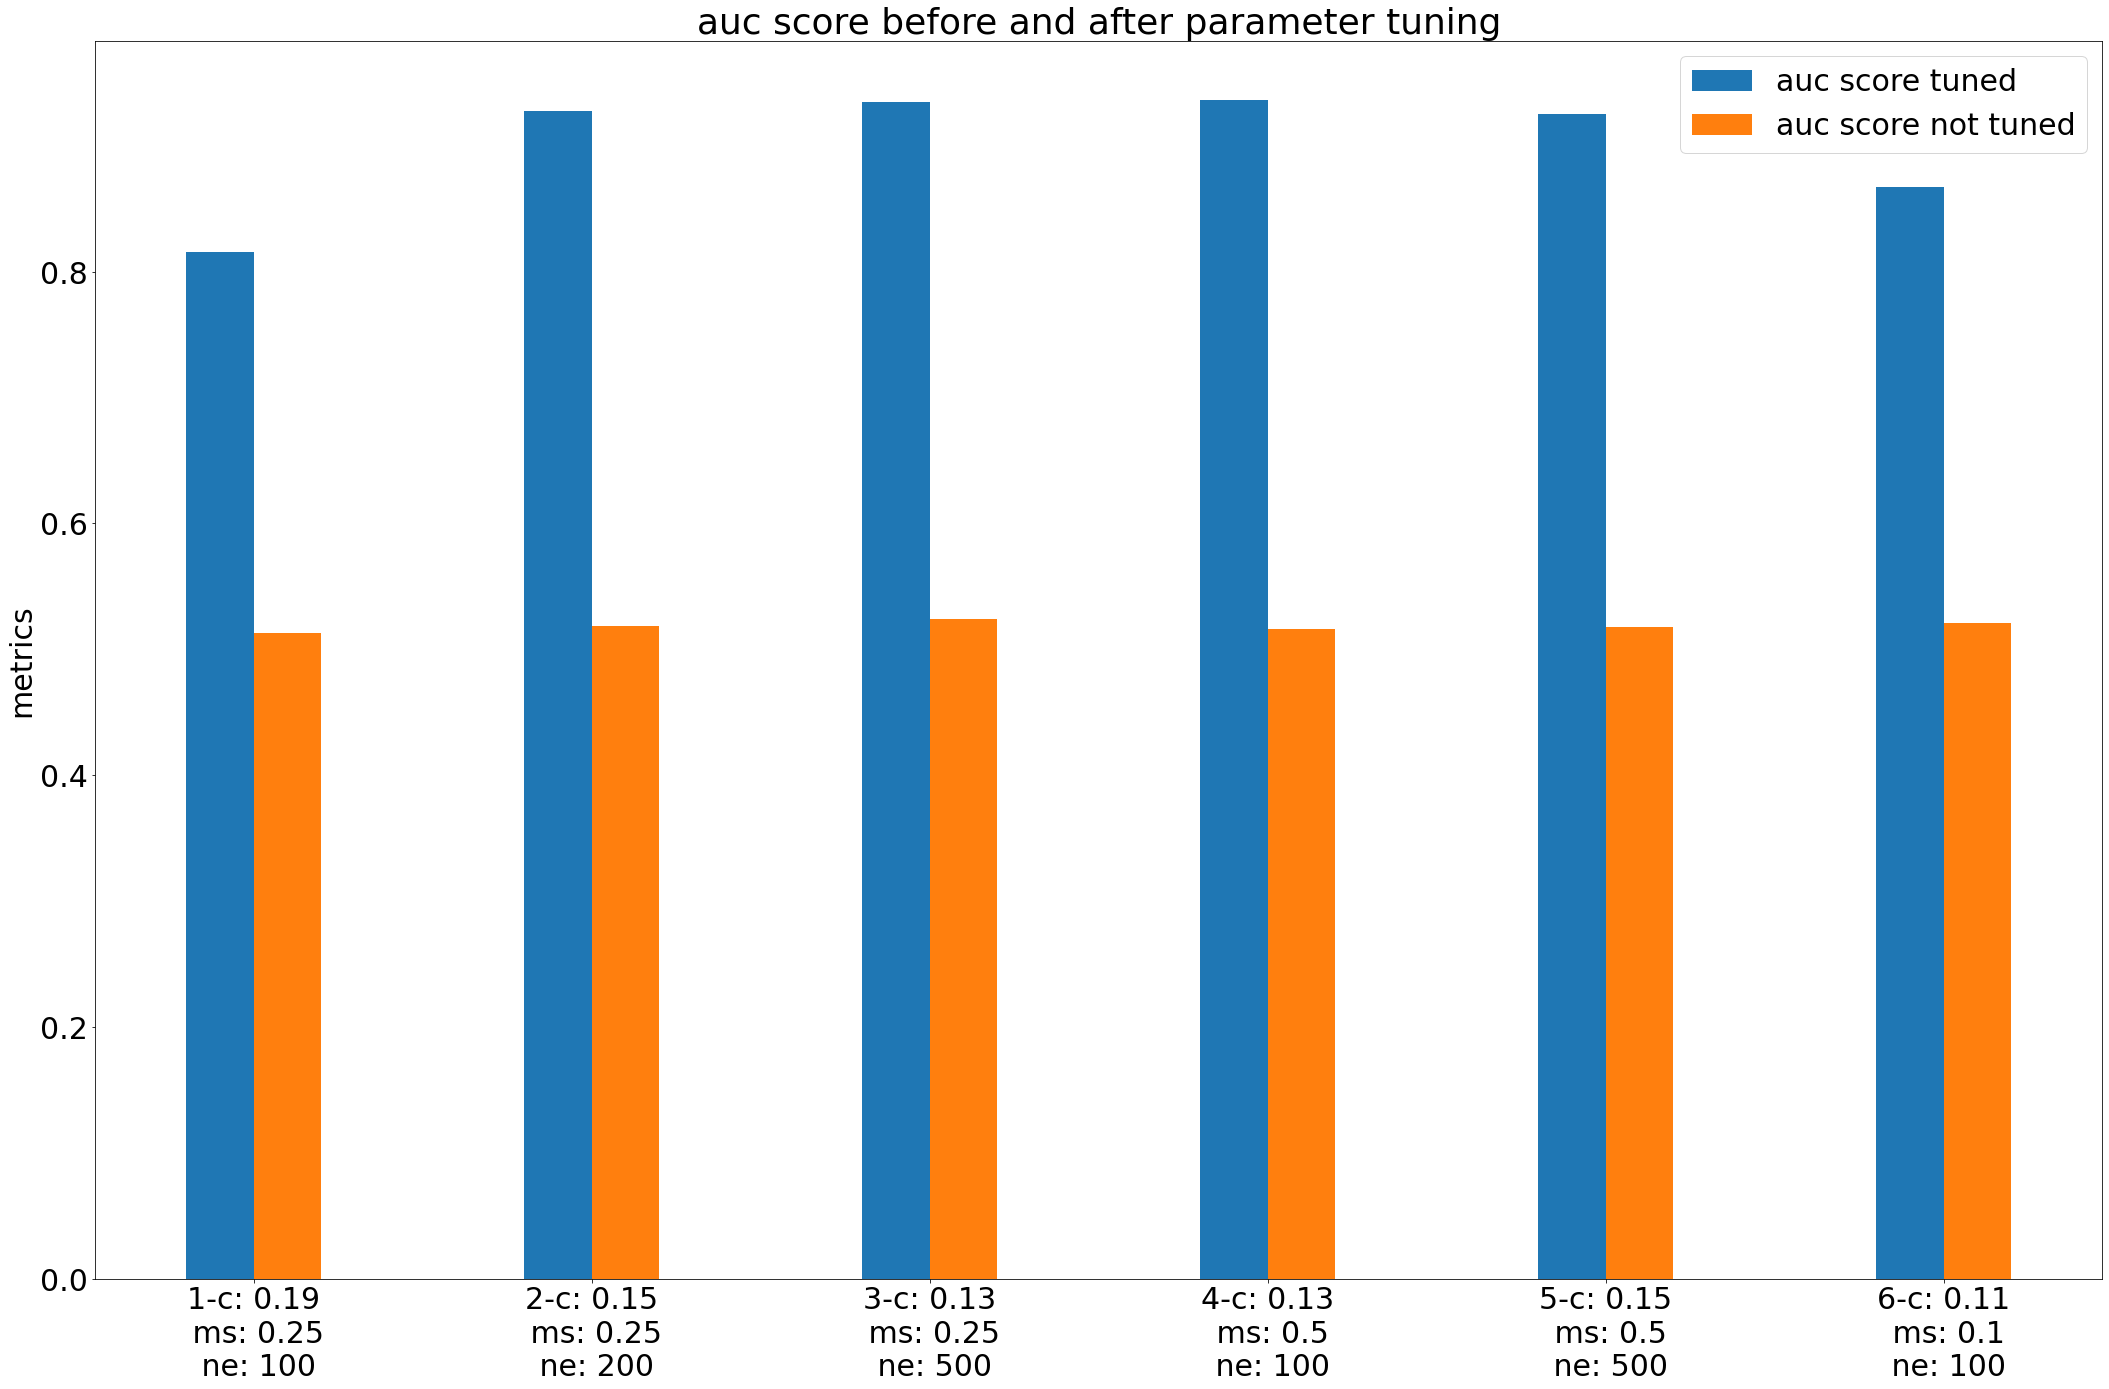

0.9011878063330069 \pm 0.049325233899179574
0.49415272431359786 \pm 0.014217649310873447
0.9011878063330068 \pm 0.049325233899179595


In [47]:
fig, ax = plt.subplots(figsize = (30,20))
plt.rc('font', size=30)

width = 1
labels = [f"{rs}-c: {c:.2}\n ms: {ms:.2}\n ne: {ne}" for rs, c, ms, ne in best_param]
ax.set_xticks([i*5 + width/2 for i in range(len(f1_tuned))])
ax.set_xticklabels(labels)
ax.set_ylabel('metrics')

ax.set_title('auc score before and after parameter tuning')

ax.bar([i*5 for i in range(len(auc_tuned))], auc_tuned, width=width)
ax.bar([i*5 + width for i in range(len(auc_not_tuned))], auc_not_tuned, width=width)
fig.tight_layout()
ax.legend(['auc score tuned', 'auc score not tuned'])
plt.savefig("IF_graph_auc_sf_70p.png", dpi=100)
plt.show()

import statistics 
m = statistics.mean(auc_tuned)
s = statistics.stdev(auc_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(f1_tuned)
s = statistics.stdev(f1_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(r_tuned)
s = statistics.stdev(r_tuned)
print(f"{m} \pm {s}")

# 100%

anomaly rate is 0.5% out of 703066 records
Finished trainning in 0:00:26.641326 seconds
contamination: 0.05 	 tp: 683/support: 842/predicted: 8817 -> fp = 8134
AUC : 88.2% 	 precision: 0.0775 	 recall: 0.811 	 f1: 0.5585825517420077
--------------------
Finished trainning in 0:00:26.566152 seconds
contamination: 0.07 	 tp: 684/support: 842/predicted: 12247 -> fp = 11563
AUC : 87.3% 	 precision: 0.0559 	 recall: 0.812 	 f1: 0.5349416611459239
--------------------
Finished trainning in 0:00:26.569847 seconds
contamination: 0.09000000000000001 	 tp: 684/support: 842/predicted: 15806 -> fp = 15122
AUC : 86.3% 	 precision: 0.0433 	 recall: 0.812 	 f1: 0.5182722827095416
--------------------
Finished trainning in 0:00:26.568057 seconds
contamination: 0.11000000000000001 	 tp: 684/support: 842/predicted: 19318 -> fp = 18634
AUC : 85.3% 	 precision: 0.0354 	 recall: 0.812 	 f1: 0.5055739026857009
--------------------
Finished trainning in 0:00:26.708370 seconds
contamination: 0.13 	 tp: 688/su

<ipython-input-14-44bd02033004>:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


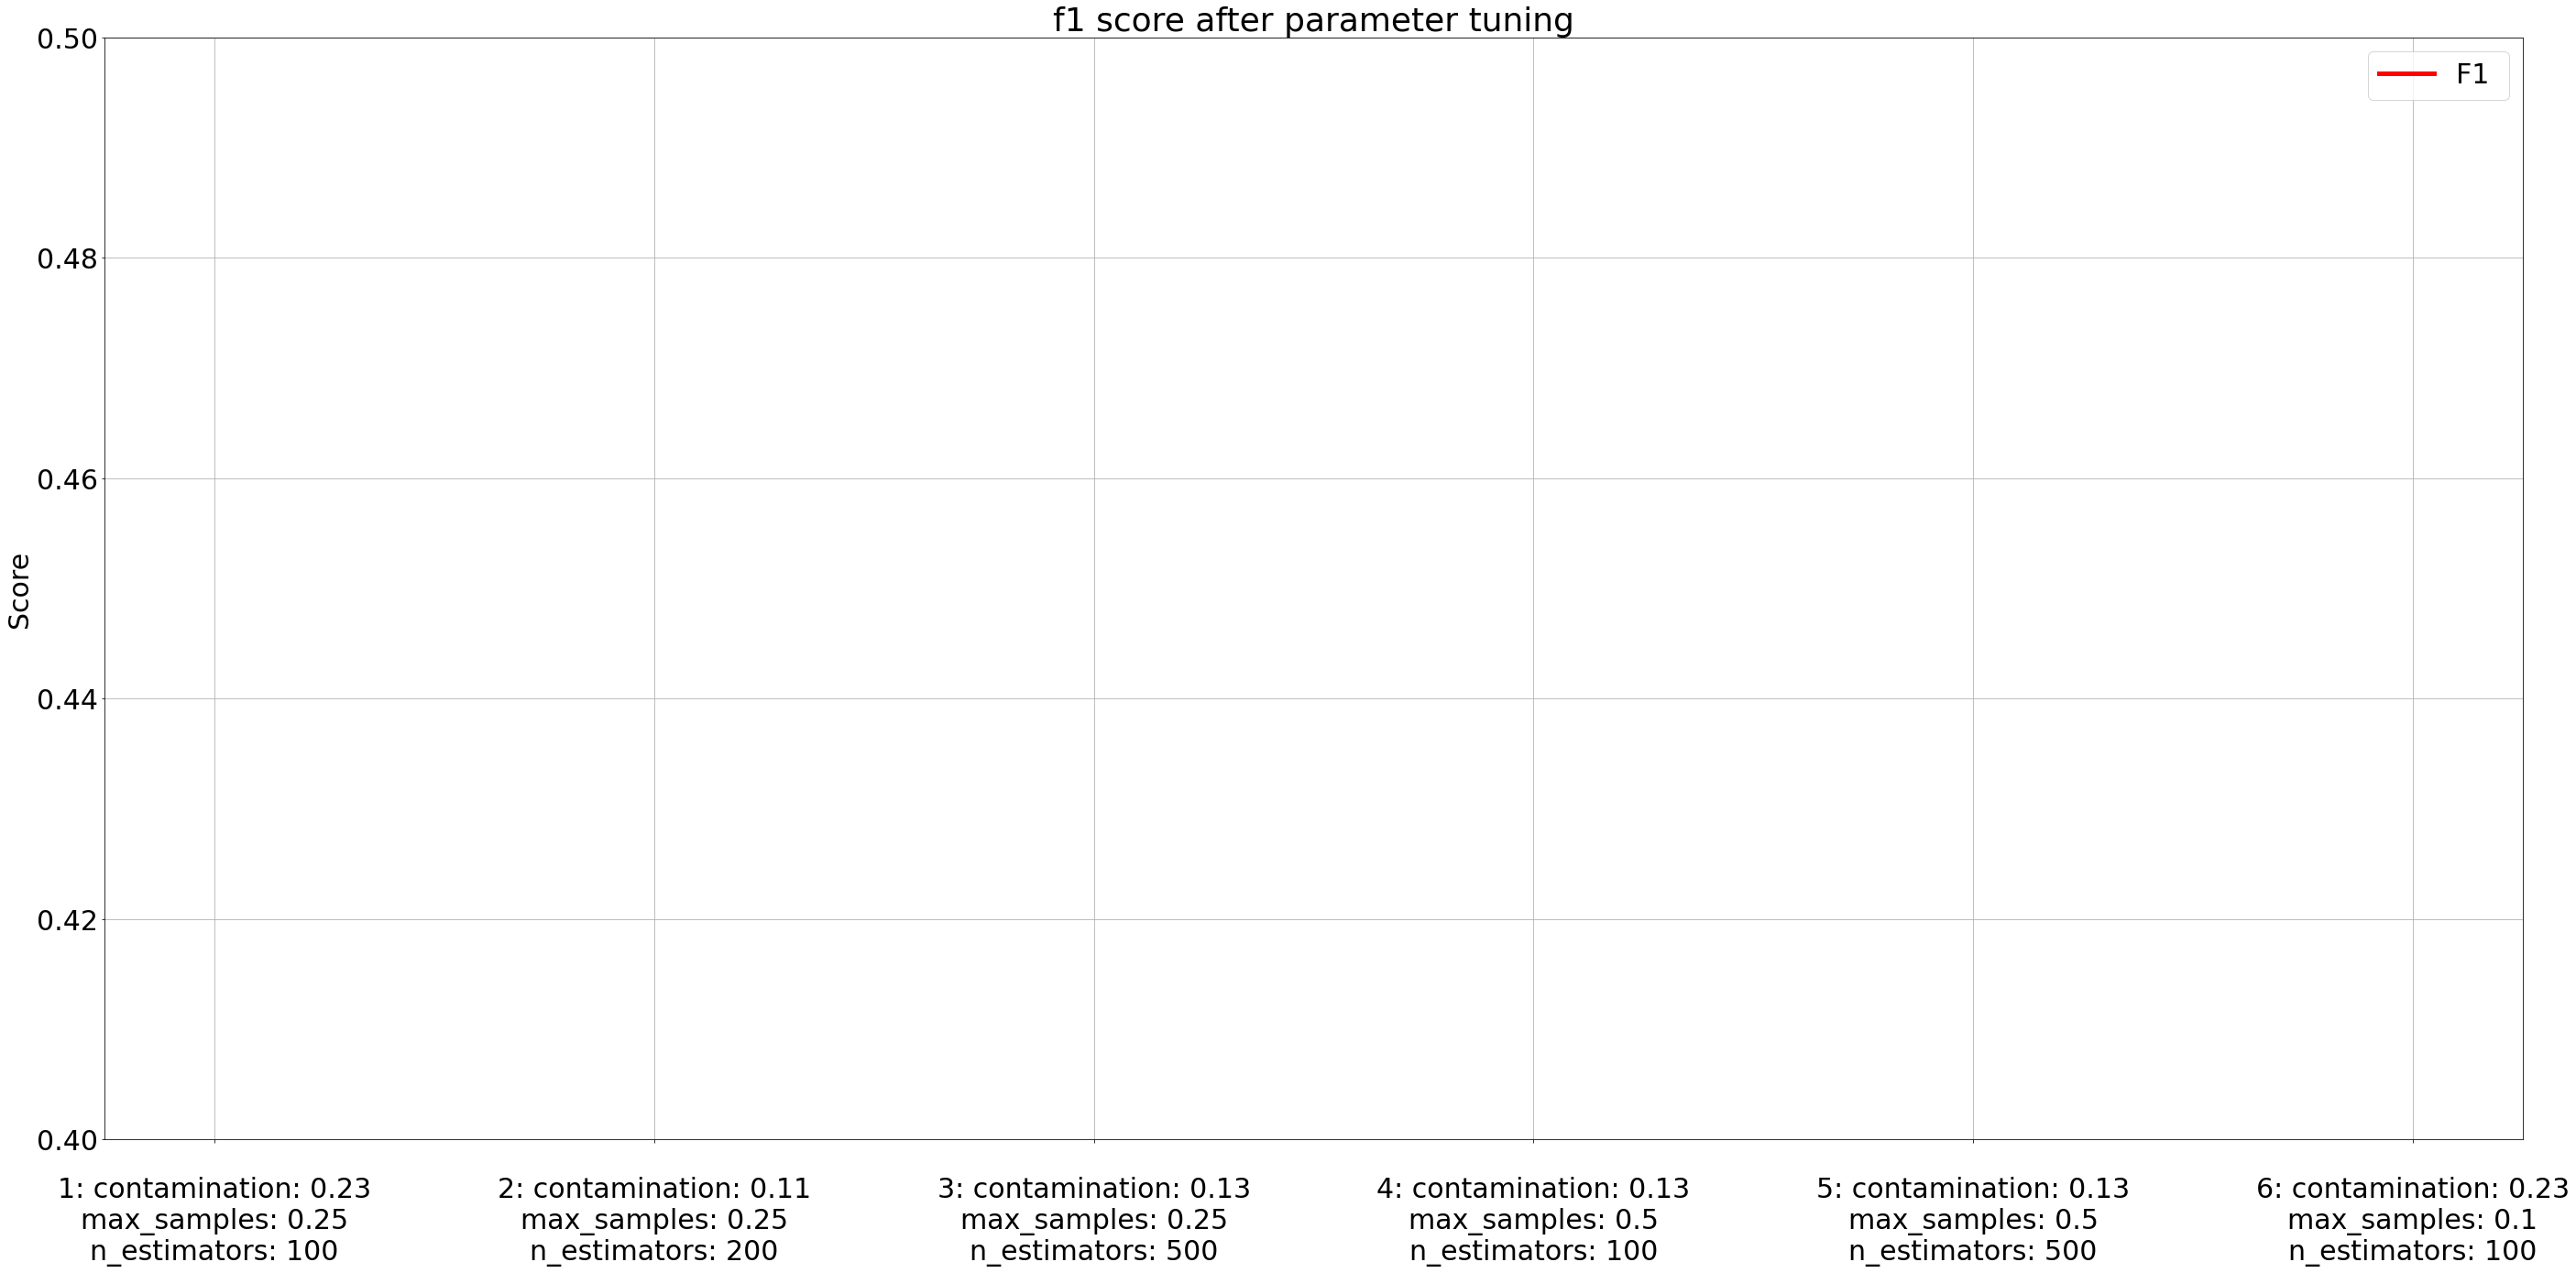

<ipython-input-14-44bd02033004>:143: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


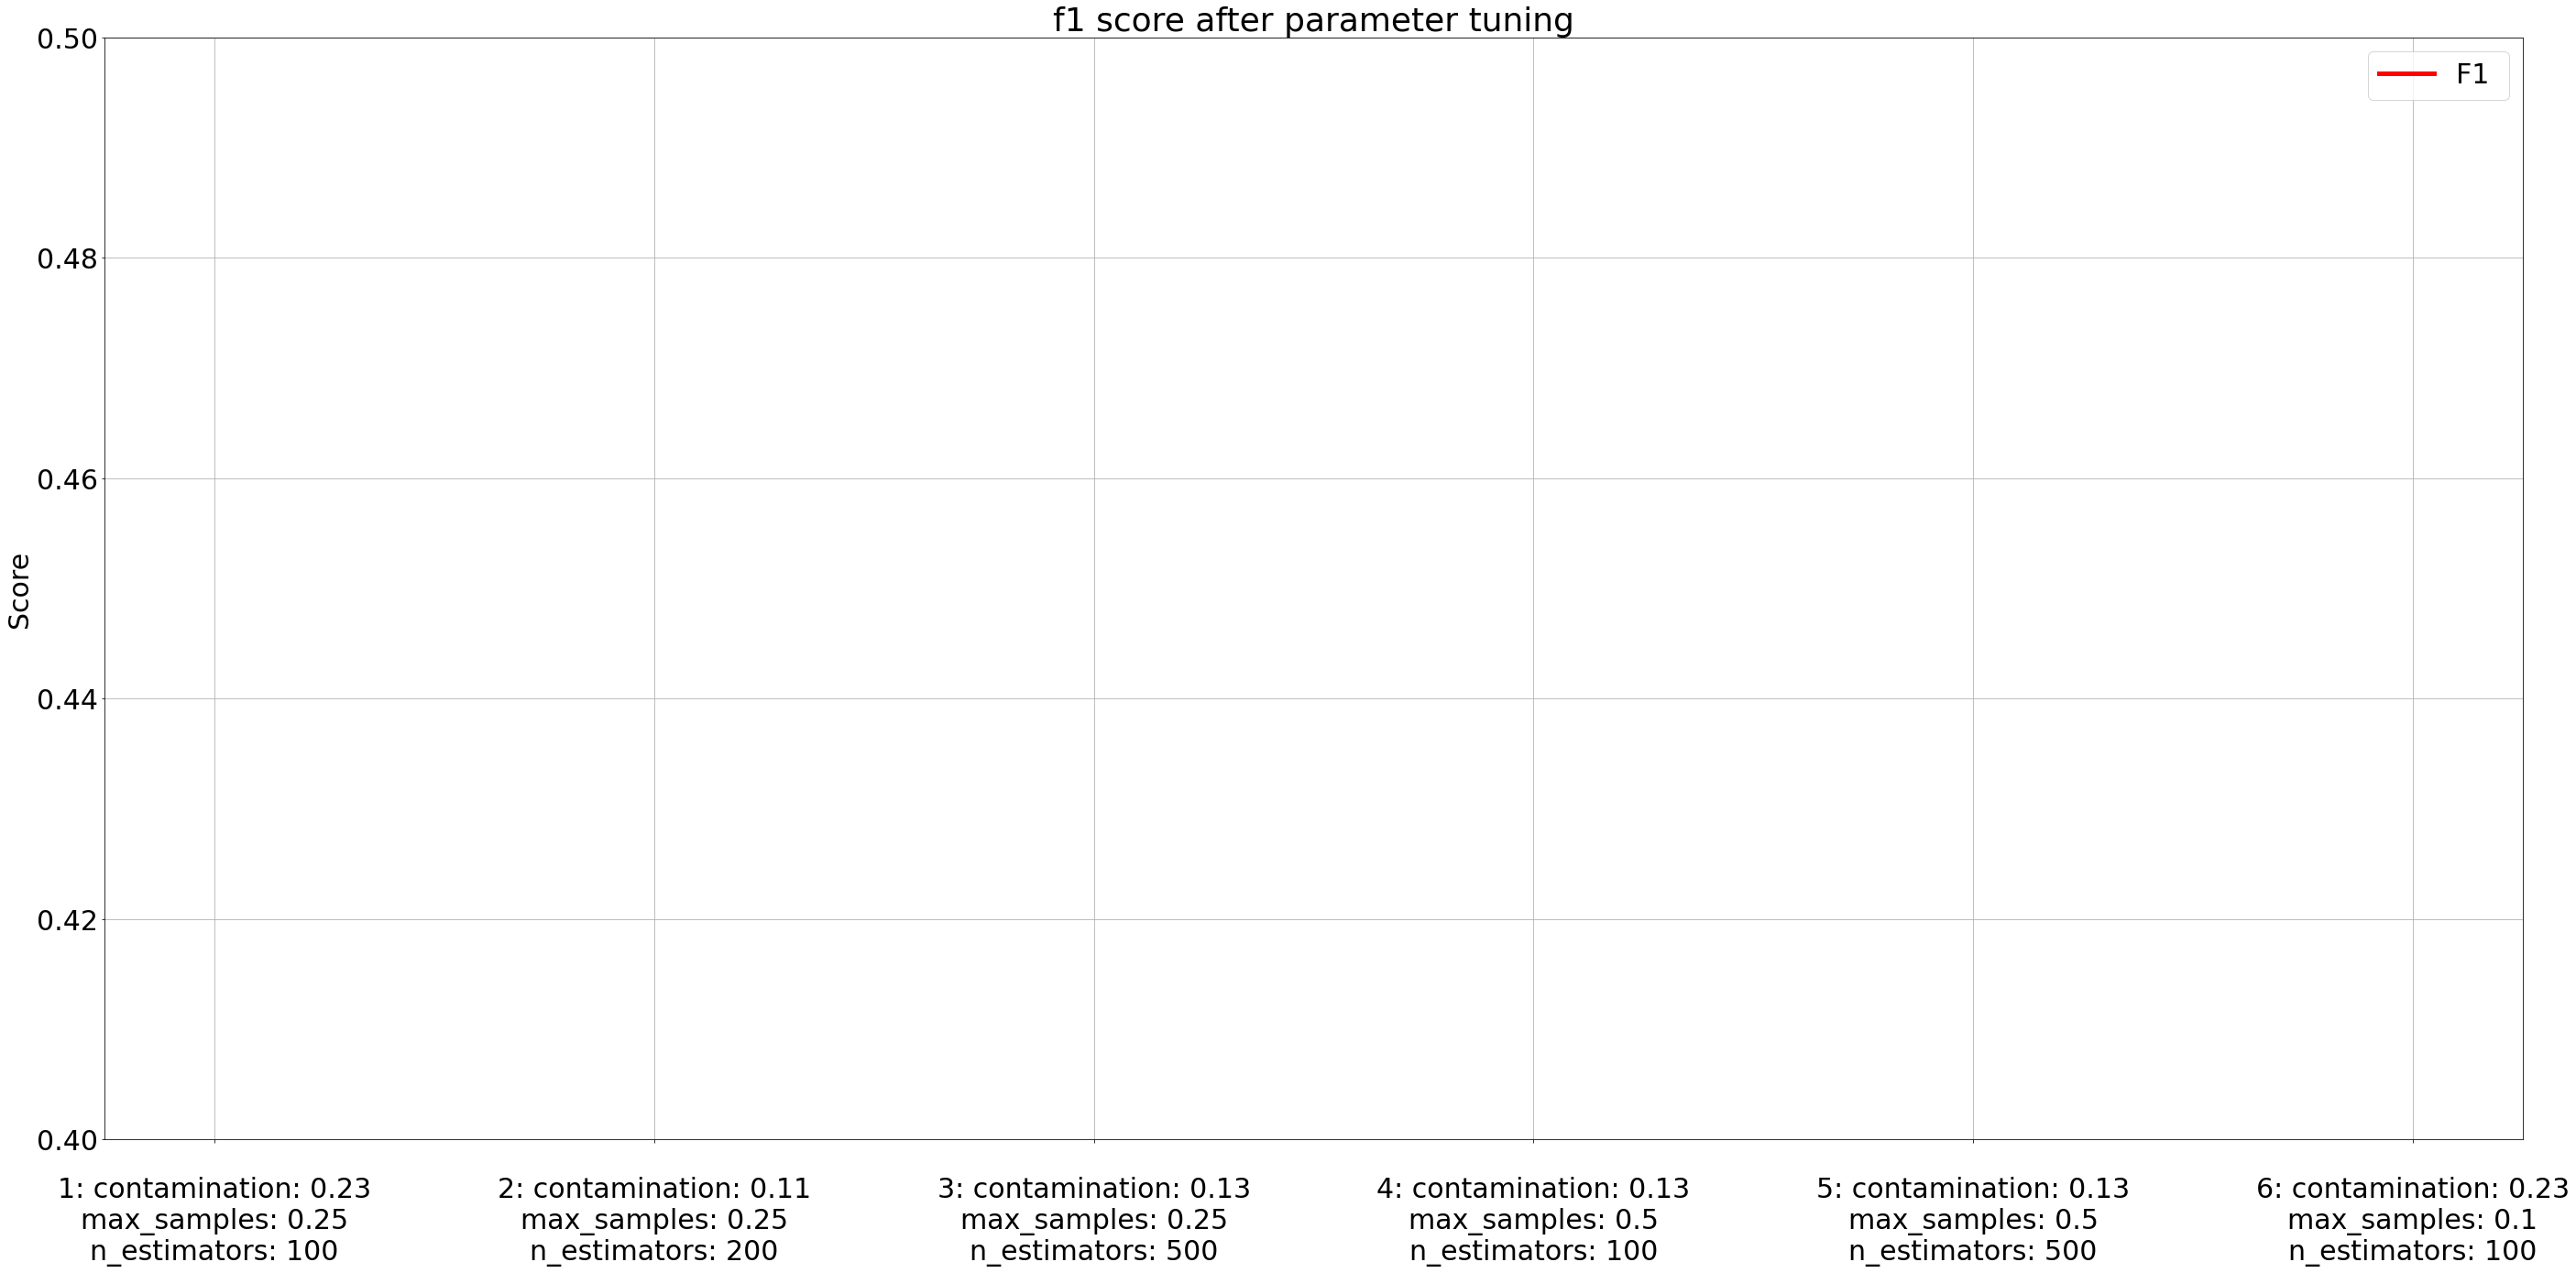

---[1, 0.23000000000000004, 0.25, 100]
Time for IF fitting: 26.398
---0.04093268035962284
---0.8863041337363112
---0.8863041337363111
---0.14278993178075747
---[2, 0.11000000000000001, 0.25, 200]
Time for IF fitting: 52.539
---0.08543940980010965
---0.9475530272711681
---0.9475530272711681
---0.13915857605177995
---[3, 0.13, 0.25, 500]
Time for IF fitting: 132.021
---0.07048309586038276
---0.9346041899927235
---0.9346041899927235
---0.13731275533363596
---[4, 0.13, 0.5, 100]
Time for IF fitting: 29.176
---0.07343868841375813
---0.9367398210532978
---0.9367398210532978
---0.1437016825829923
---[5, 0.13, 0.5, 500]
Time for IF fitting: 146.983
---0.0704558910597987
---0.9359836999451352
---0.9359836999451352
---0.13467244921250857
---[6, 0.23000000000000004, 0.1, 100]
Time for IF fitting: 23.159
---0.042711551090895826
---0.8869134461560031
---0.886913446156003
---0.14395306859205775


In [14]:
frac = 1.0

dfSF = dfsf_normal.sample(frac = frac, random_state = 1).append(dfsf_attack.sample(frac = frac, random_state = 1))

anomaly_rate = 1.0 - len(dfSF.loc[dfSF["target"]=='normal.'])/len(dfSF)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfSF)} records")

dfSF['binary_target'] = [1 if x=='normal.' else -1 for x in dfSF["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfSF[f] = leSF.fit_transform(dfSF[f])

Y_axis_f1 = []
Y_axis_recall = []
Y_axis_auc = []
best_param = []

rs = 1
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=False)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
Y_axis_auc.append(roc_auc_score(y_test, y_pred))
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 2
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 200

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 3
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.25
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 4
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 5
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.5
n_estimators = 500

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

rs = 6
x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

contaminations = np.arange(0.05, 0.4, 0.02)
max_samples = 0.1
n_estimators = 100

stime = time.time()
cmax, y_pred, f, fp, tp, p, r, t = cross_validation(contaminations, max_samples, n_estimators, rs, silent=True)
print("Time for IF fitting: %.3f" % (time.time() - stime))
Y_axis_f1.append(f)
Y_axis_recall.append(r)
best_param.append((rs, cmax, max_samples, n_estimators))
print(rs, cmax, max_samples, n_estimators)

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_F1.png", dpi=100)

plt.show()

plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('f1 score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis_f1, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_AUC.png", dpi=100)

plt.show()

# Comparison against default values

f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []

for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.045, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))

In [50]:
f1_tuned = []
auc_tuned = []
r_tuned = []
f1_not_tuned = []
r_not_tuned = []
auc_not_tuned = []
best_param = [(1, 0.23, 0.25, 100), (2, 0.11, 0.25, 200), (3, 0.13, 0.25, 500), (4, 0.13, 0.5, 100), (5, 0.13, 0.5, 500), (6, 0.23, 0.1, 100)]
for rs, c, ms, ne in best_param:
    print(f"---{[rs, c, ms, ne]}")
    x_train, x_test, y_train, y_test = train_test_split(dfSF.drop(["target", "binary_target"], axis=1), dfSF['binary_target'], test_size=0.25, random_state=rs)

    stime = time.time()
    y_pred = IsolationForest(random_state= rs, n_jobs=-1, max_samples = ms, n_estimators = ne, contamination=c).fit(x_train).predict(x_test)
    print("Time for IF fitting: %.3f" % (time.time() - stime))
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_tuned.append(f)
    a = roc_auc_score(y_test, y_pred)
    print(f"---{a}")
    auc_tuned.append(a)
    r = recall_score(y_test, y_pred, average = 'macro')
    print(f"---{r}")
    r_tuned.append(r)
    y_pred = IsolationForest(contamination = 0.005, random_state= rs, n_jobs = -1).fit(x_train).predict(x_test)
    f = f1_score(y_test, y_pred, pos_label=-1)
    print(f"---{f}")
    f1_not_tuned.append(f)
    r_not_tuned.append(recall_score(y_test, y_pred, average = 'macro'))
    auc_not_tuned.append(roc_auc_score(y_test, y_pred))
    

---[1, 0.23, 0.25, 100]
Time for IF fitting: 26.793
---0.04093268035962284
---0.8863041337363112
---0.8863041337363111
---0.03170731707317074
---[2, 0.11, 0.25, 200]
Time for IF fitting: 53.580
---0.08543940980010965
---0.9475530272711681
---0.9475530272711681
---0.041025641025641026
---[3, 0.13, 0.25, 500]
Time for IF fitting: 133.416
---0.07048309586038276
---0.9346041899927235
---0.9346041899927235
---0.050955414012738856
---[4, 0.13, 0.5, 100]
Time for IF fitting: 29.391
---0.07343868841375813
---0.9367398210532978
---0.9367398210532978
---0.03628367234744365
---[5, 0.13, 0.5, 500]
Time for IF fitting: 147.518
---0.0704558910597987
---0.9359836999451352
---0.9359836999451352
---0.03962703962703963
---[6, 0.23, 0.1, 100]
Time for IF fitting: 23.113
---0.042711551090895826
---0.8869134461560031
---0.886913446156003
---0.04635387224420576


<ipython-input-51-d14a4ee2acf7>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


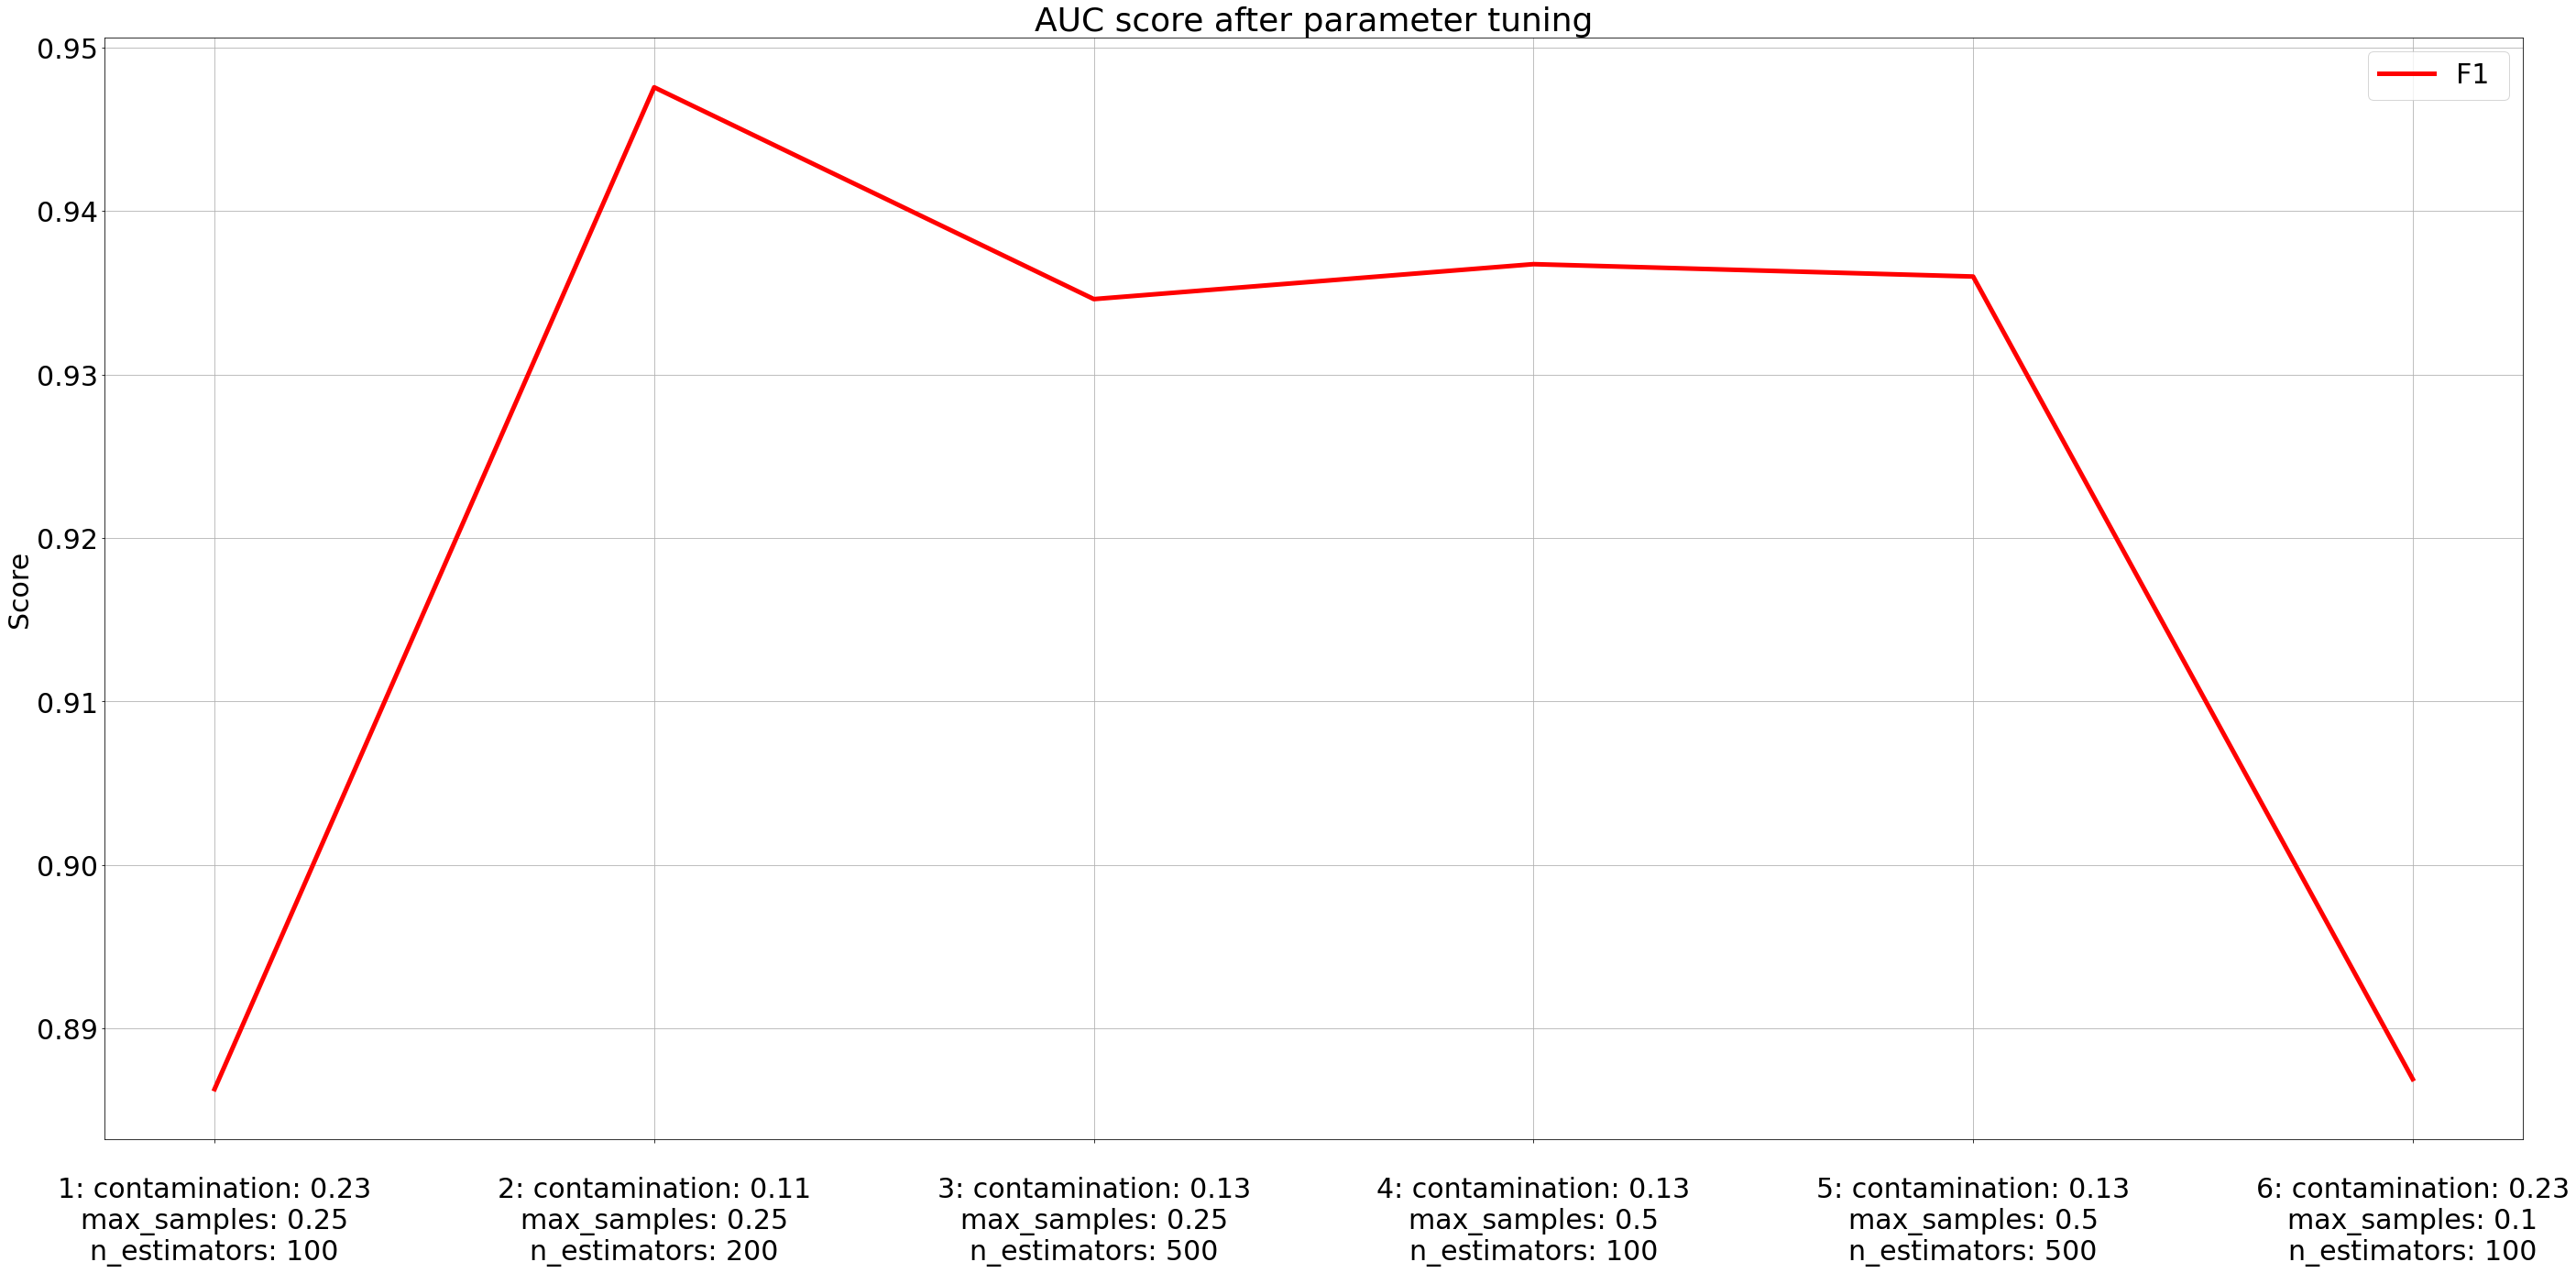

In [51]:
plt.figure(figsize=(40,20))
plt.rc('font', size=30)

plt.title('AUC score after parameter tuning')
plt.ylabel("Score")
ax = plt.axes()
# ax.set_ylim(0.4, 0.5)
pad = 0.005

labels = [f"\n{rs}: contamination: {cmax:.2}\nmax_samples: {max_samples}\nn_estimators: {n_estimators}" for rs, cmax, max_samples, n_estimators in best_param]
colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'AUC'


# Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)
Y_axis = auc_tuned

ax.plot(X_axis, Y_axis, '-', color=colors['1'],label="%s " % ("F1"), linewidth=5)
# ax.plot(X_axis, Y_axis_recall, '-', color=colors['2'],label="%s " % ("Recall"), linewidth=5)

plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_v2_AUC_100p.png", dpi=100)

plt.show()

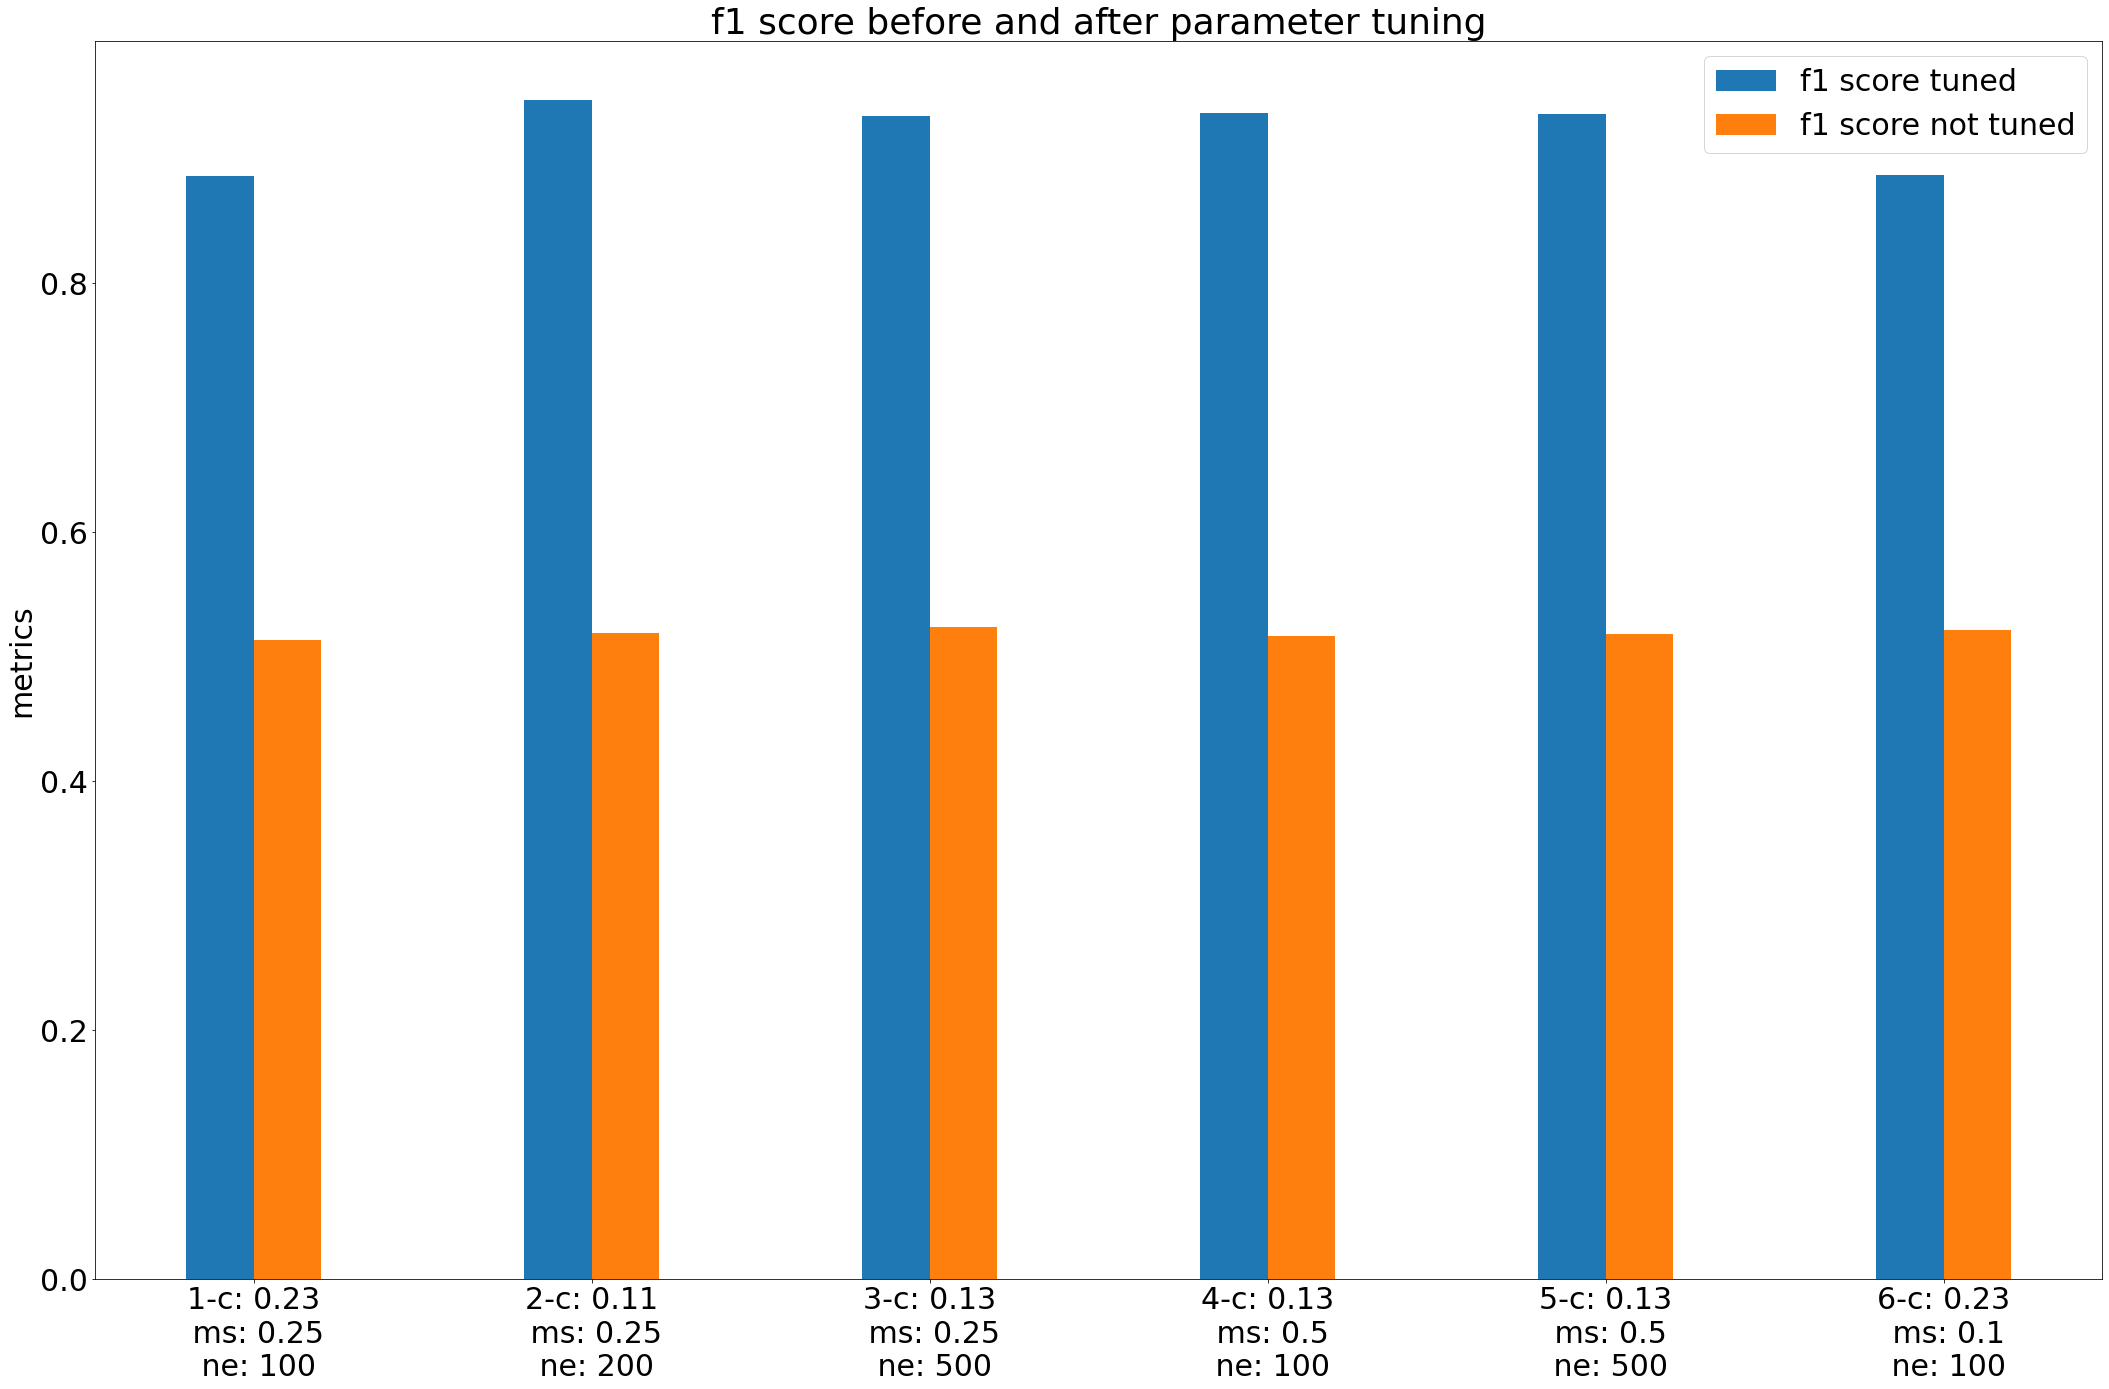

0.9213497196924398 \pm 0.02730330726862587
0.06391021943076132 \pm 0.01798720168288076
0.9213497196924398 \pm 0.02730330726862593


In [52]:
fig, ax = plt.subplots(figsize = (30,20))
plt.rc('font', size=30)

width = 1
labels = [f"{rs}-c: {c:.2}\n ms: {ms:.2}\n ne: {ne}" for rs, c, ms, ne in best_param]
ax.set_xticks([i*5 + width/2 for i in range(len(auc_tuned))])
ax.set_xticklabels(labels)
ax.set_ylabel('metrics')

ax.set_title('f1 score before and after parameter tuning')

ax.bar([i*5 for i in range(len(auc_tuned))], auc_tuned, width=width)
ax.bar([i*5 + width for i in range(len(auc_not_tuned))], auc_not_tuned, width=width)
fig.tight_layout()
ax.legend(['f1 score tuned', 'f1 score not tuned'])
plt.savefig("IF_graph_auc_sf_100p.png", dpi=100)
plt.show()

import statistics 
m = statistics.mean(auc_tuned)
s = statistics.stdev(auc_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(f1_tuned)
s = statistics.stdev(f1_tuned)
print(f"{m} \pm {s}")
m = statistics.mean(r_tuned)
s = statistics.stdev(r_tuned)
print(f"{m} \pm {s}")